# 2020 Farms analysis

In [101]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
from pandas.plotting import table 
import os
from PIL import Image
import base64
import html
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sys
import six
import seaborn as sns
import glob
from scipy import stats

In [224]:
import matplotlib as mpl
mpl.rcParams.update(mpl.rcParamsDefault)

CB_color_cycle1 = ['#332288', '#117733', '#882255',
                  '#D3A819', '#a65628', '#984ea3',
                  '#999999', '#e41a1c', '#dede00']

CB_color_cycle2 = ['#785EF0', '#DC267F', '#FE6100',
                  '#88CCEE', '#a65628', '#984ea3',
                  '#FFB000', '#e41a1c', '#dede00']

from cycler import cycler
mpl.rcParams['axes.prop_cycle'] = cycler(color=CB_color_cycle1)


In [103]:
file_path = r'C:\Users\dbensaso\Documents\NREL 2020 Internship\2020_Farm_Results' 
folder_name= 'tabular_data_pickle' # a folder by this name should be created prior in path above 
final_path= os.path.join(file_path, folder_name)

# Combien all pickle files in the path 
dx = glob.glob('{}\*'.format(final_path))
data=pd.DataFrame([])
for i in dx: 
    dw1= pd.read_pickle(i)
    data = data.append(dw1, ignore_index=True)

In [104]:
aep_sort=data.sort_values(by ='AEP_Gain_Opt', inplace= False)

In [105]:
table_pickle = "2020_current_results"
data.to_pickle(r'C:\Users\dbensaso\floris\examples\optimization\scipy\{}'.format(table_pickle))
    

In [106]:
data['Farm Name']

0                  Amazon Wind Farm US Central
1                     Amazon Wind Farm US East
2                                Apple Blossom
3                  Aragonne Wind LLC (Pastura)
4                            Arbuckle Mountain
5                             Arkwright Summit
6                              Armadillo Flats
7                             Armenia Mountain
8                           Aurora County Wind
9                                       Baffin
10                                  Bear Creek
11                                 Beech Ridge
12                         Beethoven Wind, LLC
13                                   Bent Tree
14                              Berkshire Wind
15                                      Bethel
16                          Big Blue Wind Farm
17        Big Smile Wind Farm at Dempsey Ridge
18                                  Big Timber
19                                Bingham Lake
20                                Bingham Wind
21           

c:\users\dbensaso\appdata\local\continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(3.5, 1.0, 'Std.dev: 0.58%')

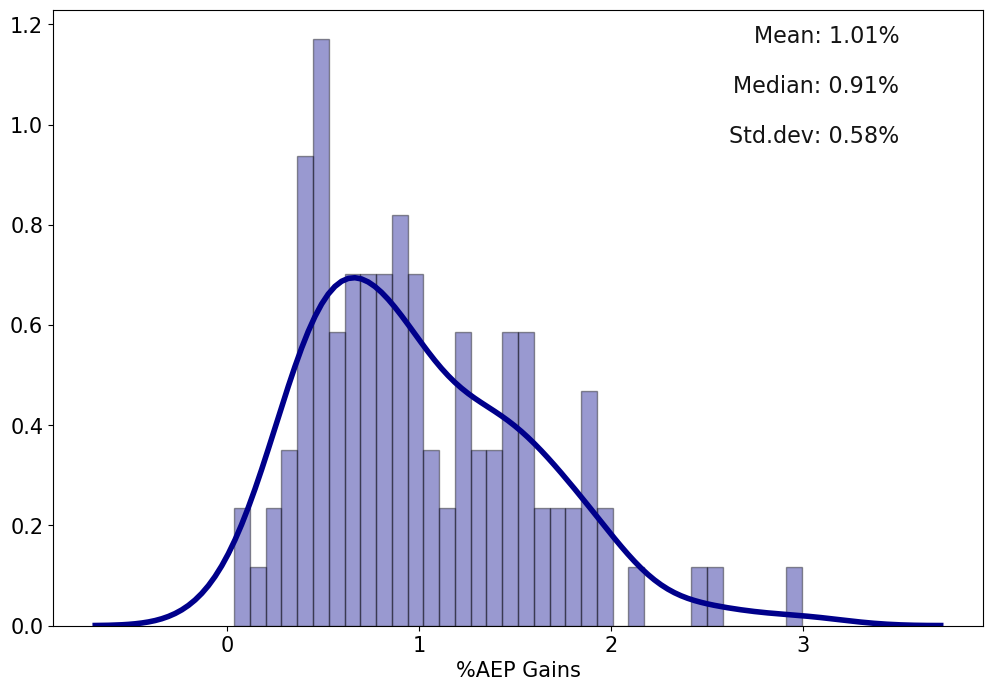

In [107]:
fig, ax = plt.subplots(1,1,figsize=(12,8))
sns.distplot(data['AEP_Gain_Opt'], hist=True, kde=True,
             bins=int(180/5), color = 'darkblue',
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})

mean=round(data['AEP_Gain_Opt'].mean(),2)
median=round(data['AEP_Gain_Opt'].median(),2)
stan=round(data['AEP_Gain_Opt'].std(),2)
ax.tick_params(axis='both', labelsize=15)

ax.set_xlabel('%AEP Gains', fontsize=15)
label1 = 'Mean: ' + str(mean) +'%'
ax.annotate(label1,xy=(3.5,1.2), ha='right',va='top',color='.08',fontsize=16)
label2 = 'Median: ' + str(median)+'%'
ax.annotate(label2,xy=(3.5,1.1), ha='right',va='top',color='.08',fontsize=16)
label3 = 'Std.dev: ' + str(stan)+'%'
ax.annotate(label3,xy=(3.5,1.0), ha='right',va='top',color='.08',fontsize=16)

## By Region (subset of farms for representative set) 

In [108]:
excel_list = pd.read_excel(r'C:\Users\dbensaso\Documents\NREL 2020 Internship\2020 Filter in region.xlsx',\
                           sheet_name='Farms In first subset')

subset_list= excel_list['Subset']
data_sub = pd.DataFrame([])
for i in range(len(subset_list)):
    if subset_list[i] in data.values:
        kf = (data.loc[data['Farm Name'] == subset_list[i]])
        data_sub = data_sub.append(kf, ignore_index=True)

Text(3.5, 1.0, 'Std.dev: 0.61%')

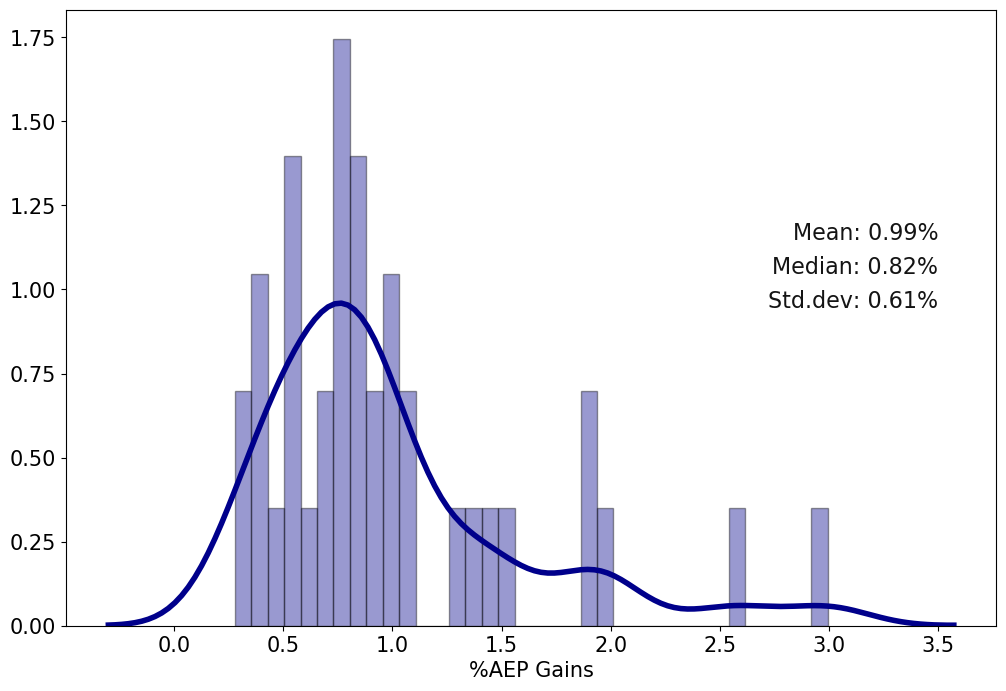

In [109]:
fig, ax = plt.subplots(1,1,figsize=(12,8))
sns.distplot(data_sub['AEP_Gain_Opt'], hist=True, kde=True,
             bins=int(180/5), color = 'darkblue',
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})

mean=round(data_sub['AEP_Gain_Opt'].mean(),2)
median=round(data_sub['AEP_Gain_Opt'].median(),2)
stan=round(data_sub['AEP_Gain_Opt'].std(),2)
ax.tick_params(axis='both', labelsize=15)

ax.set_xlabel('%AEP Gains', fontsize=15)
label1 = 'Mean: ' + str(mean) +'%'
ax.annotate(label1,xy=(3.5,1.2), ha='right',va='top',color='.08',fontsize=16)
label2 = 'Median: ' + str(median)+'%'
ax.annotate(label2,xy=(3.5,1.1), ha='right',va='top',color='.08',fontsize=16)
label3 = 'Std.dev: ' + str(stan)+'%'
ax.annotate(label3,xy=(3.5,1.0), ha='right',va='top',color='.08',fontsize=16)

c:\users\dbensaso\appdata\local\continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


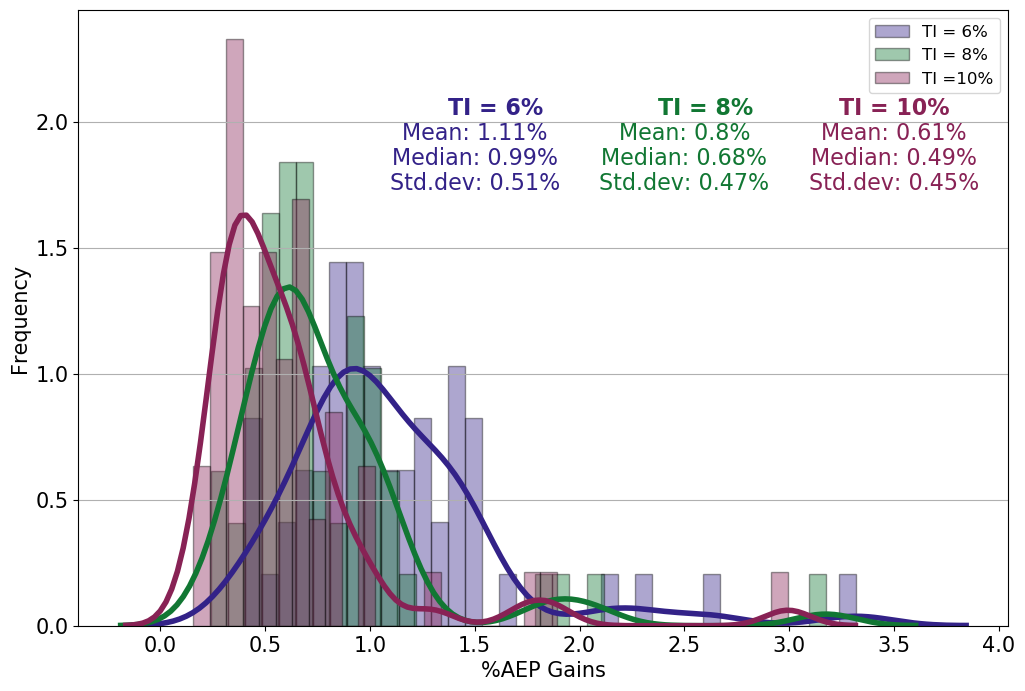

In [219]:
file_path = r'C:\Users\dbensaso\Documents\NREL 2020 Internship\Sub_farm_final_results' 
folder_name_8= 'tabular_data_pickle' # a folder by this name should be created prior in path above 
final_path_8= os.path.join(file_path, folder_name_8)

# Combien all pickle files in the path 
dx = glob.glob('{}\*'.format(final_path_8))
data_new_sub_8=pd.DataFrame([])
for i in dx: 
    dw1= pd.read_pickle(i)
    data_new_sub_8 = data_new_sub_8.append(dw1, ignore_index=True)
    

folder_name_6= 'tabular_data_pickle_6' # a folder by this name should be created prior in path above 
final_path_6= os.path.join(file_path, folder_name_6)

# Combien all pickle files in the path 
dx = glob.glob('{}\*'.format(final_path_6))
data_new_sub_6=pd.DataFrame([])
for i in dx: 
    dw1= pd.read_pickle(i)
    data_new_sub_6 = data_new_sub_6.append(dw1, ignore_index=True)
    
folder_name_10= 'tabular_data_pickle_10' # a folder by this name should be created prior in path above 
final_path_10= os.path.join(file_path, folder_name_10)

# Combien all pickle files in the path 
dx = glob.glob('{}\*'.format(final_path_10))
data_new_sub_10=pd.DataFrame([])
for i in dx: 
    dw1= pd.read_pickle(i)
    data_new_sub_10 = data_new_sub_10.append(dw1, ignore_index=True)


fig, ax = plt.subplots(1,1,figsize=(12,8))
sns.distplot(data_new_sub_6['AEP_Gain_Opt'], hist=True, kde=True,
             bins=int(180/5), color = '#332288',
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4},
            label='TI = 6%')
sns.distplot(data_new_sub_8['AEP_Gain_Opt'], hist=True, kde=True,
             bins=int(180/5), color = '#117733',
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4},
            label='TI = 8%')
sns.distplot(data_new_sub_10['AEP_Gain_Opt'], hist=True, kde=True,
             bins=int(180/5), color = '#882255',
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4},
            label='TI =10%')

mean_8=round(data_new_sub_8['AEP_Gain_Opt'].mean(),2)
median_8=round(data_new_sub_8['AEP_Gain_Opt'].median(),2)
stan_8=round(data_new_sub_8['AEP_Gain_Opt'].std(),2)

mean_6=round(data_new_sub_6['AEP_Gain_Opt'].mean(),2)
median_6=round(data_new_sub_6['AEP_Gain_Opt'].median(),2)
stan_6=round(data_new_sub_6['AEP_Gain_Opt'].std(),2)

mean_10=round(data_new_sub_10['AEP_Gain_Opt'].mean(),2)
median_10=round(data_new_sub_10['AEP_Gain_Opt'].median(),2)
stan_10=round(data_new_sub_10['AEP_Gain_Opt'].std(),2)
ax.tick_params(axis='both', labelsize=15)

ax.set_xlabel('%AEP Gains', fontsize=15)
ax.set_ylabel('Frequency', fontsize=15)


label1 = 'Mean: ' + str(mean_6) +'%'
ax.annotate(label1,xy=(1.5,2.0), ha='center',va='top',color='#332288',fontsize=16)
label2 = 'Median: ' + str(median_6)+'%'
ax.annotate(label2,xy=(1.5,1.9), ha='center',va='top',color='#332288',fontsize=16)
label3 = 'Std.dev: ' + str(stan_6)+'%'
ax.annotate(label3,xy=(1.5,1.8), ha='center',va='top',color='#332288',fontsize=16)
label4 = 'TI = 6%'
ax.annotate(label4,xy=(1.6,2.1), ha='center',va='top',color='#332288',fontsize=16, fontweight='bold')

label5 = 'Mean: ' + str(mean_8) +'%'
ax.annotate(label5,xy=(2.5,2.0), ha='center',va='top',color='#117733',fontsize=16)
label6 = 'Median: ' + str(median_8)+'%'
ax.annotate(label6,xy=(2.5,1.9), ha='center',va='top',color='#117733',fontsize=16)
label7 = 'Std.dev: ' + str(stan_8)+'%'
ax.annotate(label7,xy=(2.5,1.8), ha='center',va='top',color='#117733',fontsize=16)
label8 = 'TI = 8%'
ax.annotate(label8,xy=(2.6,2.1), ha='center',va='top',color='#117733',fontsize=16,fontweight='bold')

label9 = 'Mean: ' + str(mean_10) +'%'
ax.annotate(label9,xy=(3.5,2.0), ha='center',va='top',color='#882255',fontsize=16)
label10 = 'Median: ' + str(median_10)+'%'
ax.annotate(label10,xy=(3.5,1.9), ha='center',va='top',color='#882255',fontsize=16)
label11 = 'Std.dev: ' + str(stan_10)+'%'
ax.annotate(label11,xy=(3.5,1.8), ha='center',va='top',color='#882255',fontsize=16)
label12 = 'TI = 10%'
ax.annotate(label12,xy=(3.5,2.1), ha='center',va='top',color='#882255',fontsize=16, fontweight='bold')
plt.legend(fontsize=12)
ax.grid(axis='y')


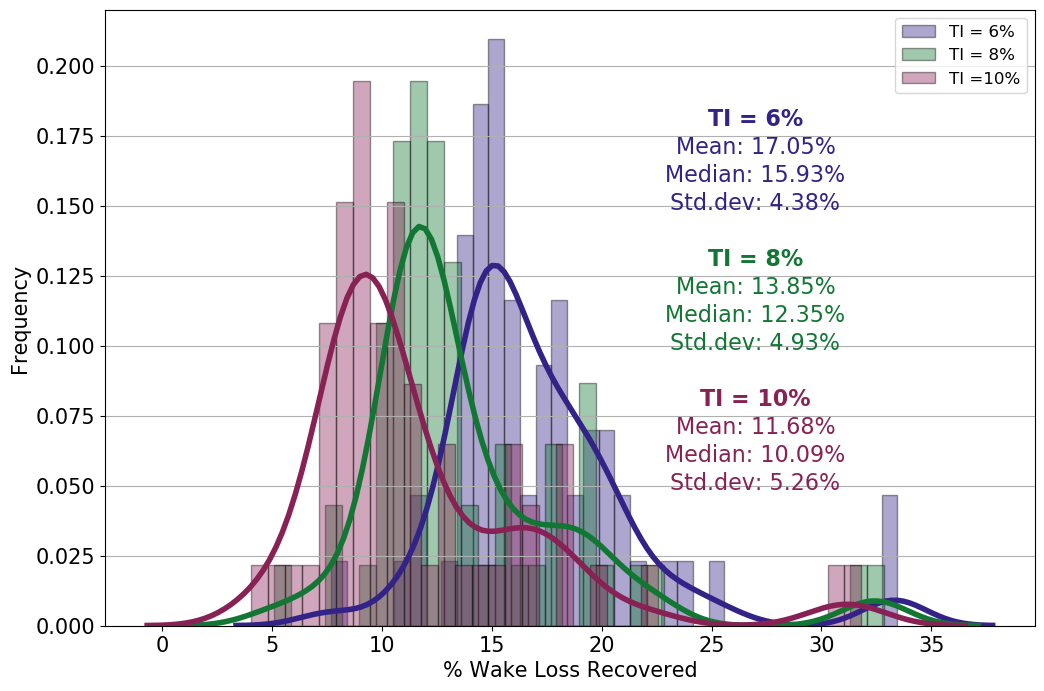

In [236]:
## take a look at the dist of yaw recovered

fig, ax = plt.subplots(1,1,figsize=(12,8))
sns.distplot(data_new_sub_6['Loss_Red_Opt'], hist=True, kde=True,
             bins=int(180/5), color = '#332288',
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4},
            label='TI = 6%')
sns.distplot(data_new_sub_8['Loss_Red_Opt'], hist=True, kde=True,
             bins=int(180/5), color = '#117733',
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4},
            label='TI = 8%')
sns.distplot(data_new_sub_10['Loss_Red_Opt'], hist=True, kde=True,
             bins=int(180/5), color = '#882255',
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4},
            label='TI =10%')

mean_8=round(data_new_sub_8['Loss_Red_Opt'].mean(),2)
median_8=round(data_new_sub_8['Loss_Red_Opt'].median(),2)
stan_8=round(data_new_sub_8['Loss_Red_Opt'].std(),2)

mean_6=round(data_new_sub_6['Loss_Red_Opt'].mean(),2)
median_6=round(data_new_sub_6['Loss_Red_Opt'].median(),2)
stan_6=round(data_new_sub_6['Loss_Red_Opt'].std(),2)

mean_10=round(data_new_sub_10['Loss_Red_Opt'].mean(),2)
median_10=round(data_new_sub_10['Loss_Red_Opt'].median(),2)
stan_10=round(data_new_sub_10['Loss_Red_Opt'].std(),2)
ax.tick_params(axis='both', labelsize=15)

ax.set_xlabel('% Wake Loss Recovered', fontsize=15)
ax.set_ylabel('Frequency', fontsize=15)


label1 = 'Mean: ' + str(mean_6) +'%'
ax.annotate(label1,xy=(27,0.175), ha='center',va='top',color='#332288',fontsize=16)
label2 = 'Median: ' + str(median_6)+'%'
ax.annotate(label2,xy=(27,0.165), ha='center',va='top',color='#332288',fontsize=16)
label3 = 'Std.dev: ' + str(stan_6)+'%'
ax.annotate(label3,xy=(27,0.155), ha='center',va='top',color='#332288',fontsize=16)
label4 = 'TI = 6%'
ax.annotate(label4,xy=(27,0.185), ha='center',va='top',color='#332288',fontsize=16, fontweight='bold')

label5 = 'Mean: ' + str(mean_8) +'%'
ax.annotate(label5,xy=(27,0.125), ha='center',va='top',color='#117733',fontsize=16)
label6 = 'Median: ' + str(median_8)+'%'
ax.annotate(label6,xy=(27,0.115), ha='center',va='top',color='#117733',fontsize=16)
label7 = 'Std.dev: ' + str(stan_8)+'%'
ax.annotate(label7,xy=(27,0.105), ha='center',va='top',color='#117733',fontsize=16)
label8 = 'TI = 8%'
ax.annotate(label8,xy=(27,0.135), ha='center',va='top',color='#117733',fontsize=16,fontweight='bold')

label9 = 'Mean: ' + str(mean_10) +'%'
ax.annotate(label9,xy=(27,0.075), ha='center',va='top',color='#882255',fontsize=16)
label10 = 'Median: ' + str(median_10)+'%'
ax.annotate(label10,xy=(27,0.065), ha='center',va='top',color='#882255',fontsize=16)
label11 = 'Std.dev: ' + str(stan_10)+'%'
ax.annotate(label11,xy=(27,0.055), ha='center',va='top',color='#882255',fontsize=16)
label12 = 'TI = 10%'
ax.annotate(label12,xy=(27,0.085), ha='center',va='top',color='#882255',fontsize=16, fontweight='bold')
plt.legend(fontsize=12)
ax.grid(axis='y')

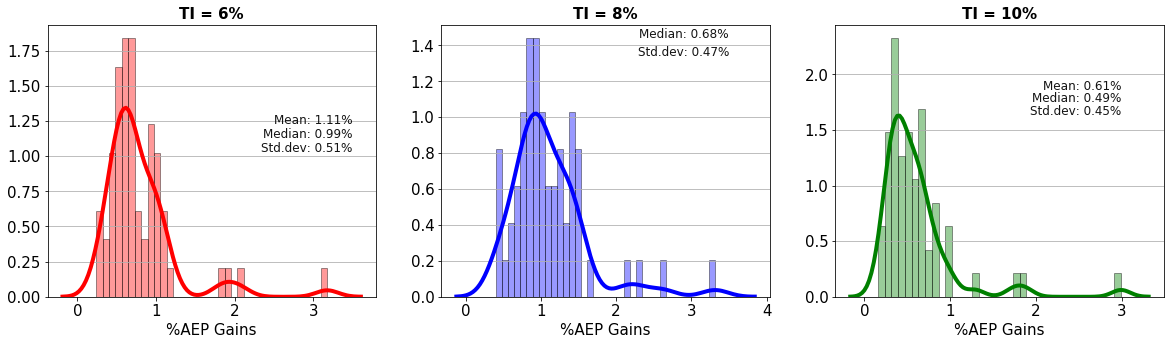

In [30]:
fig, ax = plt.subplots(1, 3, figsize=(20, 5), sharex=False)

sns.distplot(data_new_sub_6['AEP_Gain_Opt'], hist=True, kde=True,
             bins=int(180/5), color = 'b',
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4},
                    ax = ax[1])
sns.distplot(data_new_sub_8['AEP_Gain_Opt'], hist=True, kde=True,
             bins=int(180/5), color = 'r',
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4},
            ax = ax[0])
sns.distplot(data_new_sub_10['AEP_Gain_Opt'], hist=True, kde=True,
             bins=int(180/5), color = 'g',
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4},
            ax = ax[2])

mean_8=round(data_new_sub_8['AEP_Gain_Opt'].mean(),2)
median_8=round(data_new_sub_8['AEP_Gain_Opt'].median(),2)
stan_8=round(data_new_sub_8['AEP_Gain_Opt'].std(),2)
ax[1].tick_params(axis='both', labelsize=15)

mean_6=round(data_new_sub_6['AEP_Gain_Opt'].mean(),2)
median_6=round(data_new_sub_6['AEP_Gain_Opt'].median(),2)
stan_6=round(data_new_sub_6['AEP_Gain_Opt'].std(),2)
ax[0].tick_params(axis='both', labelsize=15)

mean_10=round(data_new_sub_10['AEP_Gain_Opt'].mean(),2)
median_10=round(data_new_sub_10['AEP_Gain_Opt'].median(),2)
stan_10=round(data_new_sub_10['AEP_Gain_Opt'].std(),2)
ax[2].tick_params(axis='both', labelsize=15)

ax[0].set_title('TI = 6%',fontweight="bold", size=15)
ax[0].set_xlabel('%AEP Gains', fontsize=15)
label1 = 'Mean: ' + str(mean_6) +'%'
ax[0].annotate(label1,xy=(3.5,1.3), ha='right',va='top',color='.08',fontsize=12)
label2 = 'Median: ' + str(median_6)+'%'
ax[0].annotate(label2,xy=(3.5,1.2), ha='right',va='top',color='.08',fontsize=12)
label3 = 'Std.dev: ' + str(stan_6)+'%'
ax[0].annotate(label3,xy=(3.5,1.1), ha='right',va='top',color='.08',fontsize=12)

ax[1].set_title('TI = 8%',fontweight="bold", size=15)
ax[1].set_xlabel('%AEP Gains', fontsize=15)
label1 = 'Mean: ' + str(mean_8) +'%'
ax[1].annotate(label1,xy=(3.5,1.6), ha='right',va='top',color='.08',fontsize=12)
label2 = 'Median: ' + str(median_8)+'%'
ax[1].annotate(label2,xy=(3.5,1.5), ha='right',va='top',color='.08',fontsize=12)
label3 = 'Std.dev: ' + str(stan_8)+'%'
ax[1].annotate(label3,xy=(3.5,1.4), ha='right',va='top',color='.08',fontsize=12)

ax[2].set_title('TI = 10%',fontweight="bold", size=15)
ax[2].set_xlabel('%AEP Gains', fontsize=15)
label1 = 'Mean: ' + str(mean_10) +'%'
ax[2].annotate(label1,xy=(3.0,1.95), ha='right',va='top',color='.08',fontsize=12)
label2 = 'Median: ' + str(median_10)+'%'
ax[2].annotate(label2,xy=(3.0,1.84), ha='right',va='top',color='.08',fontsize=12)
label3 = 'Std.dev: ' + str(stan_10)+'%'
ax[2].annotate(label3,xy=(3.0,1.73), ha='right',va='top',color='.08',fontsize=12)

ax[0].grid(axis='y')
ax[1].grid(axis='y')
ax[2].grid(axis='y')


## Looking at results by TI (from Excel)

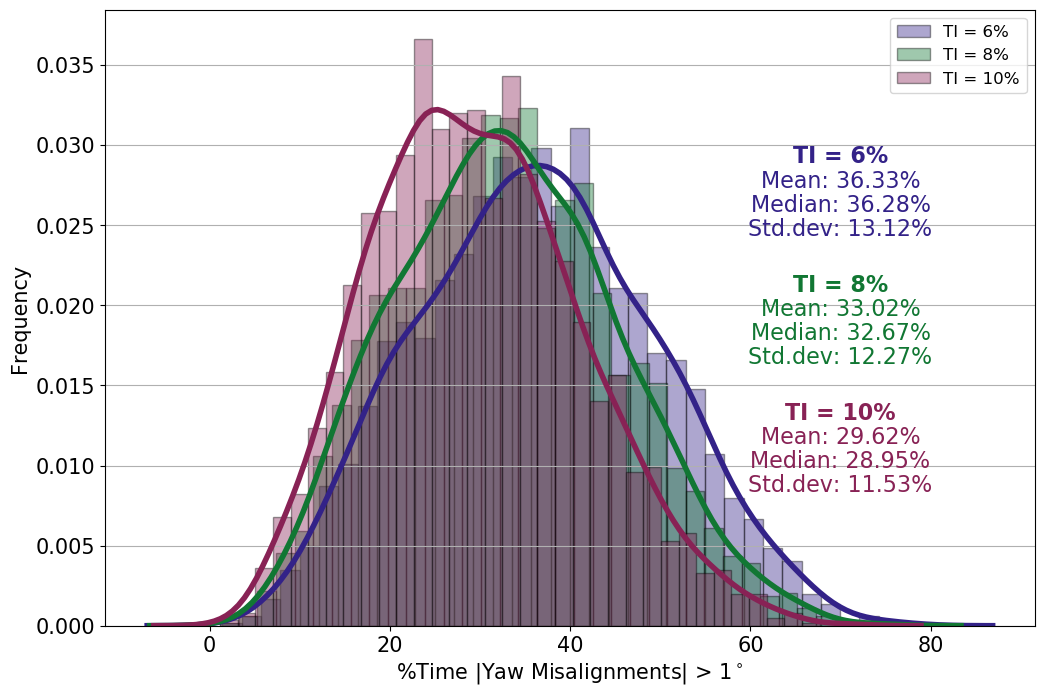

In [223]:
#### Look at distribution of FRACTION OF TIME YAW OFFSETS ARE OVER 1 DEG
yaw_frac_time = pd.read_excel(r'C:\Users\dbensaso\floris\examples\optimization\scipy\yaw_offsets_total.xlsx',\
                           sheet_name='yaw_fraction')
TI_6 = yaw_frac_time['yaw_freq_6']
TI_8 = yaw_frac_time['yaw_freq_8']
TI_10 = yaw_frac_time['yaw_freq_10']

fig, ax = plt.subplots(1,1,figsize=(12,8))
sns.distplot(yaw_frac_time['yaw_freq_6'], hist=True, kde=True,
             bins=int(180/5), color = '#332288',
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4},
            label='TI = 6%')
sns.distplot(yaw_frac_time['yaw_freq_8'], hist=True, kde=True,
             bins=int(180/5), color = '#117733',
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4},
            label='TI = 8%')
sns.distplot(yaw_frac_time['yaw_freq_10'], hist=True, kde=True,
             bins=int(180/5), color = '#882255',
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4},
            label='TI = 10%')

mean_8=round(yaw_frac_time['yaw_freq_8'].mean(),2)
median_8=round(yaw_frac_time['yaw_freq_8'].median(),2)
stan_8=round(yaw_frac_time['yaw_freq_8'].std(),2)

mean_6=round(yaw_frac_time['yaw_freq_6'].mean(),2)
median_6=round(yaw_frac_time['yaw_freq_6'].median(),2)
stan_6=round(yaw_frac_time['yaw_freq_6'].std(),2)

mean_10=round(yaw_frac_time['yaw_freq_10'].mean(),2)
median_10=round(yaw_frac_time['yaw_freq_10'].median(),2)
stan_10=round(yaw_frac_time['yaw_freq_10'].std(),2)
ax.tick_params(axis='both', labelsize=15)

label1 = 'Mean: ' + str(mean_6) +'%'
ax.annotate(label1,xy=(70,0.0285), ha='center',va='top',color='#332288',fontsize=16)
label2 = 'Median: ' + str(median_6)+'%'
ax.annotate(label2,xy=(70,0.0270), ha='center',va='top',color='#332288',fontsize=16)
label3 = 'Std.dev: ' + str(stan_6)+'%'
ax.annotate(label3,xy=(70,0.0255), ha='center',va='top',color='#332288',fontsize=16)
label4 = 'TI = 6%'
ax.annotate(label4,xy=(70,0.03), ha='center',va='top',color='#332288',fontsize=16, fontweight='bold')

label5 = 'Mean: ' + str(mean_8) +'%'
ax.annotate(label5,xy=(70,0.0205), ha='center',va='top',color='#117733',fontsize=16)
label6 = 'Median: ' + str(median_8)+'%'
ax.annotate(label6,xy=(70,0.0190), ha='center',va='top',color='#117733',fontsize=16)
label7 = 'Std.dev: ' + str(stan_8)+'%'
ax.annotate(label7,xy=(70,0.0175), ha='center',va='top',color='#117733',fontsize=16)
label8 = 'TI = 8%'
ax.annotate(label8,xy=(70,0.022), ha='center',va='top',color='#117733',fontsize=16,fontweight='bold')

label9 = 'Mean: ' + str(mean_10) +'%'
ax.annotate(label9,xy=(70,0.0125), ha='center',va='top',color='#882255',fontsize=16)
label10 = 'Median: ' + str(median_10)+'%'
ax.annotate(label10,xy=(70,0.011), ha='center',va='top',color='#882255',fontsize=16)
label11 = 'Std.dev: ' + str(stan_10)+'%'
ax.annotate(label11,xy=(70,0.0095), ha='center',va='top',color='#882255',fontsize=16)
label12 = 'TI = 10%'
ax.annotate(label12,xy=(70,0.014), ha='center',va='top',color='#882255',fontsize=16, fontweight='bold')

ax.set_ylabel('Frequency', fontsize=15)
ax.set_xlabel('%Time |Yaw Misalignments| > 1$^\circ$', fontsize=15)
plt.legend(fontsize=12)
ax.grid(axis='y')
plt.show()

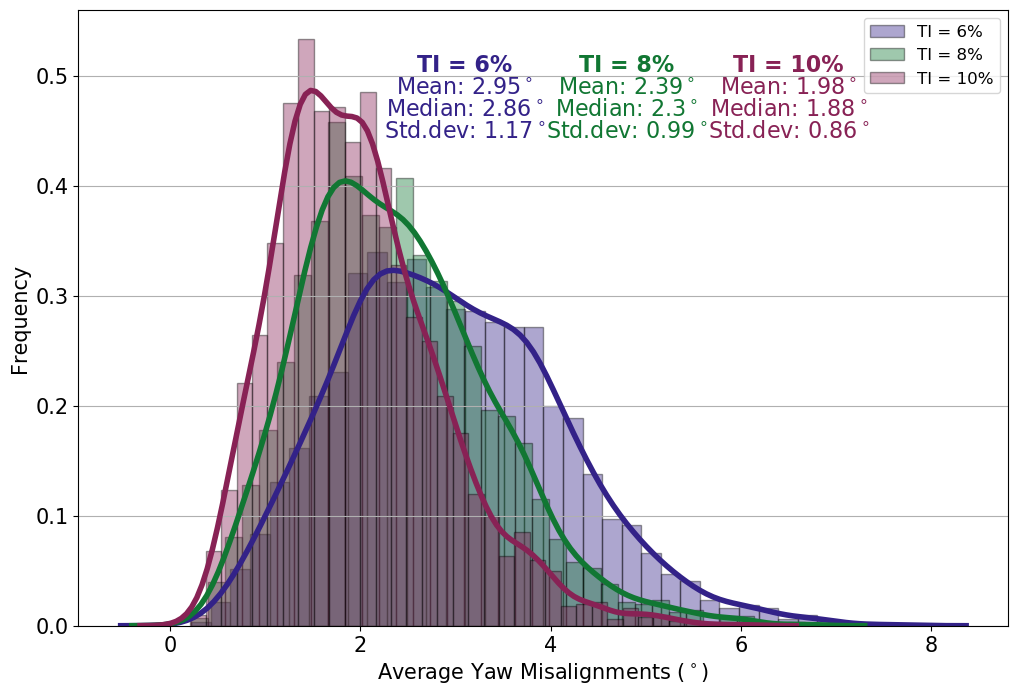

In [222]:
#### Look at distribution of yaw offsets
yaw_offsets = pd.read_excel(r'C:\Users\dbensaso\floris\examples\optimization\scipy\yaw_offsets_total.xlsx',\
                           sheet_name='yaw_offsets')
TI_6 = yaw_offsets['weighted_yaw_6']
TI_8 = yaw_offsets['weighted_yaw_8']
TI_10 = yaw_offsets['weighted_yaw_10']

fig, ax = plt.subplots(1,1,figsize=(12,8))
sns.distplot(yaw_offsets['weighted_yaw_6'], hist=True, kde=True,
             bins=int(180/5), color = '#332288',
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4},
            label='TI = 6%')
sns.distplot(yaw_offsets['weighted_yaw_8'], hist=True, kde=True,
             bins=int(180/5), color = '#117733',
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4},
            label='TI = 8%')
sns.distplot(yaw_offsets['weighted_yaw_10'], hist=True, kde=True,
             bins=int(180/5), color = '#882255',
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4},
            label='TI = 10%')
ax.set_ylabel('Frequency', fontsize=15)
ax.set_xlabel('Average Yaw Misalignments ($^\circ$)', fontsize=15)
plt.legend(fontsize=12)
ax.grid(axis='y')

mean_8=round(yaw_offsets['weighted_yaw_8'].mean(),2)
median_8=round(yaw_offsets['weighted_yaw_8'].median(),2)
stan_8=round(yaw_offsets['weighted_yaw_8'].std(),2)

mean_6=round(yaw_offsets['weighted_yaw_6'].mean(),2)
median_6=round(yaw_offsets['weighted_yaw_6'].median(),2)
stan_6=round(yaw_offsets['weighted_yaw_6'].std(),2)

mean_10=round(yaw_offsets['weighted_yaw_10'].mean(),2)
median_10=round(yaw_offsets['weighted_yaw_10'].median(),2)
stan_10=round(yaw_offsets['weighted_yaw_10'].std(),2)
ax.tick_params(axis='both', labelsize=15)

label1 = 'Mean: ' + str(mean_6) +'$^\circ$'
ax.annotate(label1,xy=(3.1,0.50), ha='center',va='top',color='#332288',fontsize=16)
label2 = 'Median: ' + str(median_6) +'$^\circ$'
ax.annotate(label2,xy=(3.1,0.48), ha='center',va='top',color='#332288',fontsize=16)
label3 = 'Std.dev: ' + str(stan_6)+'$^\circ$'
ax.annotate(label3,xy=(3.1,0.46), ha='center',va='top',color='#332288',fontsize=16)
label4 = 'TI = 6%'
ax.annotate(label4,xy=(3.1,0.52), ha='center',va='top',color='#332288',fontsize=16, fontweight='bold')

label5 = 'Mean: ' + str(mean_8)  +'$^\circ$'
ax.annotate(label5,xy=(4.8,0.50), ha='center',va='top',color='#117733',fontsize=16)
label6 = 'Median: ' + str(median_8) +'$^\circ$'
ax.annotate(label6,xy=(4.8,0.48), ha='center',va='top',color='#117733',fontsize=16)
label7 = 'Std.dev: ' + str(stan_8) +'$^\circ$'
ax.annotate(label7,xy=(4.8,0.46), ha='center',va='top',color='#117733',fontsize=16)
label8 = 'TI = 8%'
ax.annotate(label8,xy=(4.8,0.52), ha='center',va='top',color='#117733',fontsize=16,fontweight='bold')

label9 = 'Mean: ' + str(mean_10)  +'$^\circ$'
ax.annotate(label9,xy=(6.5,0.5), ha='center',va='top',color='#882255',fontsize=16)
label10 = 'Median: ' + str(median_10) +'$^\circ$'
ax.annotate(label10,xy=(6.5,0.48), ha='center',va='top',color='#882255',fontsize=16)
label11 = 'Std.dev: ' + str(stan_10) +'$^\circ$'
ax.annotate(label11,xy=(6.5,0.46), ha='center',va='top',color='#882255',fontsize=16)
label12 = 'TI = 10%'
ax.annotate(label12,xy=(6.5,0.52), ha='center',va='top',color='#882255',fontsize=16, fontweight='bold')



plt.show()

In [196]:
sum(yaw_dist['freq_8'])

3097.379155260329

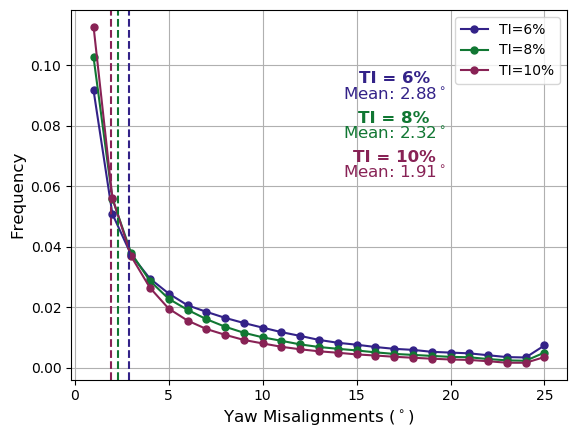

In [218]:
#### Look at distribution of yaw offsets
yaw_dist = pd.read_excel(r'C:\Users\dbensaso\floris\examples\optimization\scipy\yaw_offsets_total.xlsx',\
                           sheet_name='Dist_of_yaw')
fig, ax = plt.subplots()

plt.plot(yaw_dist['yaw'][1:], yaw_dist['freq_6'][1:]/yaw_dist['freq_6'].sum(),'o-',markersize=5,label = 'TI=6%')
plt.plot(yaw_dist['yaw'][1:], yaw_dist['freq_8'][1:]/yaw_dist['freq_8'].sum(),'o-',markersize=5,label = 'TI=8%')
plt.plot(yaw_dist['yaw'][1:], yaw_dist['freq_10'][1:]/yaw_dist['freq_10'].sum(),'o-',markersize=5,label = 'TI=10%')

average_6 = sum(yaw_dist['yaw'] * yaw_dist['freq_6']) / sum(yaw_dist['freq_6'])
average_8 = sum(yaw_dist['yaw'] * yaw_dist['freq_8']) / sum(yaw_dist['freq_8'])
average_10 = sum(yaw_dist['yaw'] * yaw_dist['freq_10']) / sum(yaw_dist['freq_10'])

plt.axvline(average_6, color='#332288', linestyle='--')
plt.axvline(average_8, color='#117733', linestyle='--')
plt.axvline(average_10, color='#882255', linestyle='--')

label1 = 'Mean: ' + str(round(average_6,2))+'$^\circ$' 
ax.annotate(label1,xy=(17,0.093), ha='center',va='top',color='#332288',fontsize=12)
label2 = 'TI = 6%'
ax.annotate(label2,xy=(17,0.098), ha='center',va='top',color='#332288',fontsize=12, fontweight='bold')

label3 = 'Mean: ' + str(round(average_8,2))+'$^\circ$'
ax.annotate(label3,xy=(17,0.080), ha='center',va='top',color='#117733',fontsize=12)
label4 = 'TI = 8%'
ax.annotate(label4,xy=(17,0.085), ha='center',va='top',color='#117733',fontsize=12, fontweight='bold')

label5 = 'Mean: ' + str(round(average_10,2))+'$^\circ$' 
ax.annotate(label5,xy=(17,0.067), ha='center',va='top',color='#882255',fontsize=12)
label6 = 'TI = 10%'
ax.annotate(label6,xy=(17,0.072), ha='center',va='top',color='#882255',fontsize=12, fontweight='bold')


plt.ylabel('Frequency', fontsize=12)
plt.xlabel('Yaw Misalignments ($^\circ$)', fontsize=12)
plt.legend()
plt.grid()

plt.show()


## Looking at farms by region

In [ ]:
data_new_sub = pd.read_pickle(r'/home/dbensaso/code/floris/examples/optimization/scipy/TI_8_farm_results')

In [130]:
excel_list_1 = pd.read_excel(r'C:\Users\dbensaso\floris\examples\optimization\scipy\2020 Filter in region.xlsx',\
                           sheet_name='By region sub', keep_default_na=False)
excel_list = pd.read_excel(r'C:\Users\dbensaso\floris\examples\optimization\scipy\2020 Filter in region.xlsx',\
                           sheet_name='Farms In second subset')
excel_list_2 = pd.read_excel(r'C:\Users\dbensaso\floris\examples\optimization\scipy\2020 Filter in region.xlsx',\
                           sheet_name='Farms_turb')

subset_list= excel_list['Subset']

west = excel_list_1['West']
interior = excel_list_1['Interior']
great_lakes = excel_list_1['Great_Lakes']
south_east = excel_list_1['South_East']
north_east = excel_list_1['North_East']

west_data = pd.DataFrame([])
interior_data = pd.DataFrame([])
great_lakes_data = pd.DataFrame([])
south_east_data = pd.DataFrame([])
north_east_data = pd.DataFrame([])

for i in range(len(subset_list)):
    if subset_list[i] in data_new_sub.values:
        kf = (data_new_sub.loc[data_new_sub['Farm Name'] == subset_list[i]])
        if subset_list[i] in west.values:
            west_data = west_data.append(kf, ignore_index=True)
            west_data['Region'] = 'West'
        if subset_list[i] in interior.values:
            interior_data = interior_data.append(kf, ignore_index=True)
            interior_data['Region'] = 'Interior'
        if subset_list[i] in great_lakes.values:
            great_lakes_data = great_lakes_data.append(kf, ignore_index=True)
            great_lakes_data['Region'] = 'Great Lakes'
        if subset_list[i] in south_east.values:
            south_east_data = south_east_data.append(kf, ignore_index=True)
            south_east_data['Region'] = 'South East'
        if subset_list[i] in north_east.values:
            north_east_data = north_east_data.append(kf, ignore_index=True)
            north_east_data['Region'] = 'North East'

c:\users\dbensaso\appdata\local\continuum\anaconda3\lib\site-packages\pandas\core\frame.py:6692: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort)


In [131]:
#Find which farm is closest to average for each region 
ne_mean = north_east_data['AEP_Gain_Opt'].mean()
w_mean = west_data['AEP_Gain_Opt'].mean()
i_mean = interior_data['AEP_Gain_Opt'].mean()
gl_mean = great_lakes_data['AEP_Gain_Opt'].mean()
se_mean = south_east_data['AEP_Gain_Opt'].mean()

west_m_f = west_data.iloc[(west_data['AEP_Gain_Opt']-w_mean).abs().argsort()[:1]]
ne_m_f = north_east_data.iloc[(north_east_data['AEP_Gain_Opt']-ne_mean).abs().argsort()[:1]]
i_m_f = interior_data.iloc[(interior_data['AEP_Gain_Opt']-i_mean).abs().argsort()[:1]]
gl_m_f = great_lakes_data.iloc[(great_lakes_data['AEP_Gain_Opt']-gl_mean).abs().argsort()[:1]]
se_m_f = south_east_data.iloc[(south_east_data['AEP_Gain_Opt']-se_mean).abs().argsort()[:1]]

close_t_avg= pd.DataFrame([])
data_f = [west_m_f, ne_m_f, i_m_f, gl_m_f, se_m_f]
for i in data_f:
    close_t_avg = close_t_avg.append(i)
close_t_avg

,#Turbine,%_Baseline,%_Opt,AEP_Baseline,AEP_Gain_Opt,AEP_No_Wake,AEP_Opt,Farm Name,Farm_lat,Farm_lon,Loss_Red_Opt,Region,Wk_Loss_Baseline,Wk_Loss_Opt
5,100,95.340578,95.821058,758.612429,0.503962,795.686837,762.435548,North Sky River,35.335575,-118.186344,10.312017,West,4.659422,4.178942
8,67,92.945559,93.857863,371.159619,0.981547,399.330127,374.802724,Noble Bliss,42.545117,-78.258640,12.932338,North East,7.054441,6.142137
3,55,93.667879,94.250573,440.203210,0.622085,469.961758,442.941649,Blue Canyon VI,34.913943,-98.553847,9.202193,Interior,6.332121,5.749427
10,100,92.653538,93.496323,714.017143,0.909609,770.631279,720.511908,Minonk,40.872223,-88.949888,11.471985,Great Lakes,7.346462,6.503677
4,44,93.741642,94.854666,215.545048,1.187331,229.935216,218.104282,Mountaineer Wind Energy Center (Thomas),39.185291,-79.535440,17.784599,South East,6.258358,5.145334


In [132]:
interior_data

,#Turbine,%_Baseline,%_Opt,AEP_Baseline,AEP_Gain_Opt,AEP_No_Wake,AEP_Opt,Farm Name,Farm_lat,Farm_lon,Loss_Red_Opt,Region,Wk_Loss_Baseline,Wk_Loss_Opt
0,109,95.054834,95.609293,1042.158024,0.583304,1096.375616,1048.236976,Armadillo Flats,36.310254,-97.552133,11.212139,Interior,4.945166,4.390707
1,43,96.408533,96.811955,354.046198,0.418451,367.235336,355.527706,"Beethoven Wind, LLC",43.175031,-98.076880,11.232790,Interior,3.591467,3.188045
2,26,96.358320,96.812729,251.392044,0.471582,260.892929,252.577564,Blackwell,36.850940,-97.426215,12.478002,Interior,3.641680,3.187271
3,55,93.667879,94.250573,440.203210,0.622085,469.961758,442.941649,Blue Canyon VI,34.913943,-98.553847,9.202193,Interior,6.332121,5.749427
4,43,95.629321,96.462079,633.163566,0.870818,662.101915,638.677270,Blue Cloud I,34.054402,-102.646363,19.053278,Interior,4.370679,3.537921
5,75,96.399017,96.790967,681.114909,0.406591,706.557938,683.884258,Border Winds Project,48.964765,-99.602687,10.884509,Interior,3.600983,3.209033
6,57,96.117680,96.586233,474.867683,0.487479,494.048218,477.182565,Breckinridge,36.447697,-97.676079,12.068915,Interior,3.882320,3.413767
7,16,96.689004,97.409412,116.729646,0.745077,120.726908,117.599372,Busch Ranch,37.781888,-104.471851,21.758037,Interior,3.310996,2.590588
8,42,96.148904,96.566989,703.799388,0.434831,731.988989,706.859727,Cactus Flats,31.111537,-100.017617,10.856270,Interior,3.851096,3.433011
9,111,94.259853,94.996140,931.426167,0.781124,988.147269,938.701764,Cedar Bluff,38.671293,-99.734851,12.826967,Interior,5.740147,5.003860


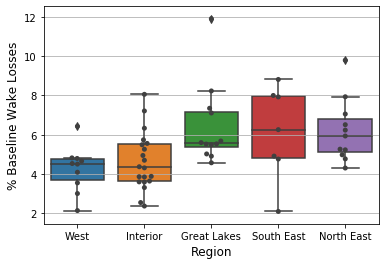

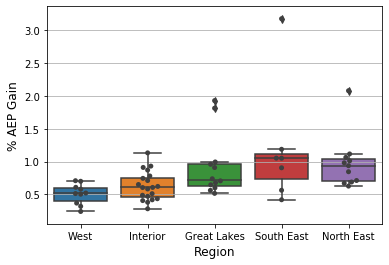

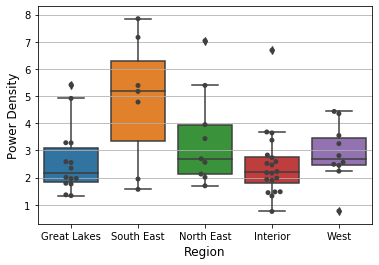

In [40]:
## Box plot to see distribution for different regions 
data_lists = [west_data, interior_data, great_lakes_data, south_east_data, north_east_data]
overall_data = pd.DataFrame([])
for i in data_lists:
    overall_data = overall_data.append(i, ignore_index=True)


ax = sns.boxplot(x="Region", y="Wk_Loss_Baseline", data=overall_data)
ax = sns.swarmplot(x="Region", y="Wk_Loss_Baseline", data=overall_data, color=".25")
ax.grid(axis='y')

plt.ylabel('% Baseline Wake Losses', fontsize=12)
plt.xlabel('Region', fontsize=12)
plt.show()

ax = sns.boxplot(x="Region", y="AEP_Gain_Opt", data=overall_data)
ax = sns.swarmplot(x="Region", y="AEP_Gain_Opt", data=overall_data, color=".25")
ax.grid(axis='y')
plt.ylabel('% AEP Gain', fontsize=12)
plt.xlabel('Region', fontsize=12)
plt.show()

ax = sns.boxplot(x="Region", y="Density_dylan", data=excel_list_2)
ax = sns.swarmplot(x="Region", y="Density_dylan", data=excel_list_2, color=".25")
ax.grid(axis='y')
plt.ylabel('Power Density', fontsize=12)
plt.xlabel('Region', fontsize=12)

plt.show()

In [133]:
overall_data

,#Turbine,%_Baseline,%_Opt,AEP_Baseline,AEP_Gain_Opt,AEP_No_Wake,AEP_Opt,Farm Name,Farm_lat,Farm_lon,Loss_Red_Opt,Region,Wk_Loss_Baseline,Wk_Loss_Opt
0,13,96.991984,97.671318,63.827186,0.700403,65.806661,64.274233,Burley Butte,42.489186,-113.922835,22.584134,West,3.008016,2.328682
1,60,95.494151,95.724080,404.986142,0.240778,424.095232,405.961261,Cold Springs,43.033497,-115.441547,5.102905,West,4.505849,4.275920
2,30,95.207517,95.786730,168.613417,0.608369,177.100950,169.639209,Dry Lake,34.654902,-110.284576,12.085865,West,4.792483,4.213270
3,32,96.450040,96.953117,228.655816,0.521592,237.071768,229.848467,Horse Butte,43.404835,-111.739454,14.171318,West,3.549960,3.046883
4,68,95.177842,95.730435,277.341518,0.580591,291.392948,278.951737,Milford Phase II,38.585220,-112.930835,11.459468,West,4.822158,4.269565
5,100,95.340578,95.821058,758.612429,0.503962,795.686837,762.435548,North Sky River,35.335575,-118.186344,10.312017,West,4.659422,4.178942
6,62,95.465909,95.956210,292.599061,0.513587,306.495862,294.101811,Perrin Ranch,35.429782,-112.289750,10.813642,West,4.534091,4.043790
7,15,97.860047,98.220368,107.762087,0.368200,110.118572,108.158867,Red Horse 2,32.288584,-110.088399,16.837794,West,2.139953,1.779632
8,116,95.908372,96.214753,916.053068,0.319452,955.133582,918.979416,Tucannon River,46.433366,-118.046519,7.487998,West,4.091628,3.785247
9,60,93.569942,94.233527,336.936014,0.709186,360.090012,339.325517,Vantage Point,46.953916,-120.161813,10.320048,West,6.430058,5.766473


# TI Generic Study Results 

In [134]:
file_path_1 = r'C:\Users\dbensaso\floris\examples\optimization\scipy\Saved_Fig\TI_Study' 
folder_name_1= 'tabular_data_pickle' # a folder by this name should be created prior in path above 
final_path_1= os.path.join(file_path_1, folder_name_1)

# Combien all pickle files in the path 
dx1 = glob.glob('{}\*'.format(final_path_1))
dx1 = [f for f in dx1 if 'Pickle' in f]
TI_data=pd.DataFrame([])
for i in dx1: 
    dw1= pd.read_pickle(i)
    TI_data = TI_data.append(dw1, ignore_index=True)
#TI_data.sort_values(by ='TI', inplace= True)

In [135]:
TI_data

,Farm Name,Rated_Power,Specific_Power,Turb_spc,TI,AEP_No_Wake,AEP_Baseline,AEP_Opt,%_Baseline,%_Opt,Wk_Loss_Baseline,Wk_Loss_Opt,AEP_Gain_Opt,Loss_Red_Opt
0,Rel_spc=10_D=160_SP=250_TI=0.06,5026.548246,250,10,0.06,948.235305,901.136426,911.268344,95.032997,96.101499,4.967003,3.898501,1.124349,21.512015
1,Rel_spc=10_D=160_SP=250_TI=0.08,5026.548246,250,10,0.08,948.235305,907.845448,912.998842,95.740524,96.283996,4.259476,3.716004,0.567651,12.759129
2,Rel_spc=10_D=160_SP=250_TI=0.12,5026.548246,250,10,0.12,948.235305,917.207209,918.560661,96.727806,96.870540,3.272194,3.129460,0.147562,4.362021
3,Rel_spc=10_D=160_SP=250_TI=0.14,5026.548246,250,10,0.14,948.235305,920.599148,921.306789,97.085517,97.160144,2.914483,2.839856,0.076867,2.560560
4,Rel_spc=10_D=160_SP=250_TI=0.16,5026.548246,250,10,0.16,948.235305,923.417996,923.777894,97.382790,97.420744,2.617210,2.579256,0.038975,1.450191
5,Rel_spc=10_D=160_SP=250_TI=0.18,5026.548246,250,10,0.18,948.235305,925.812901,926.023221,97.635354,97.657535,2.364646,2.342465,0.022717,0.937991
6,Rel_spc=10_D=160_SP=250_TI=0.1,5026.548246,250,10,0.10,948.235305,913.038326,915.644811,96.288160,96.563037,3.711840,3.436963,0.285474,7.405422
7,Rel_spc=4_D=160_SP=250_TI=0.06,5026.548246,250,4,0.06,948.235305,759.606865,825.817839,80.107423,87.089970,19.892577,12.910030,8.716479,35.101268
8,Rel_spc=4_D=160_SP=250_TI=0.08,5026.548246,250,4,0.08,948.235305,777.968389,830.754945,82.043812,87.610632,17.956188,12.389368,6.785180,31.002239
9,Rel_spc=4_D=160_SP=250_TI=0.12,5026.548246,250,4,0.12,948.235305,808.139517,839.030508,85.225630,88.483365,14.774370,11.516635,3.822482,22.049907


c:\users\dbensaso\appdata\local\continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
c:\users\dbensaso\appdata\local\continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
c:\users\dbensaso\appdata\local\continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


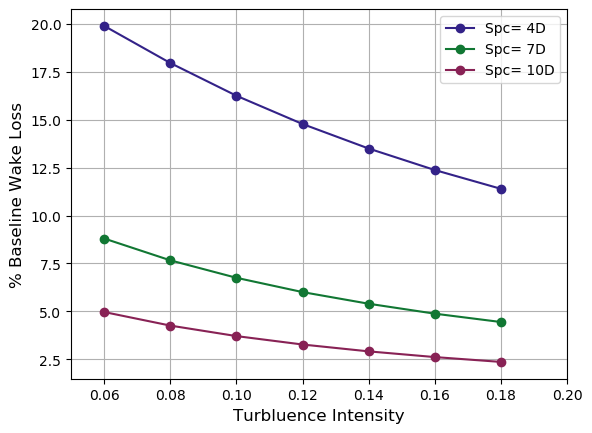

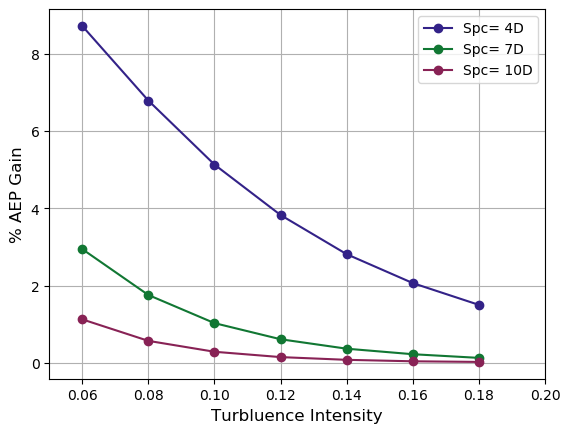

In [138]:
ti_4 = TI_data[TI_data['Turb_spc'] == 4]
ti_7 = TI_data[TI_data['Turb_spc'] == 7]
ti_10 = TI_data[TI_data['Turb_spc'] == 10]
ti_4.sort_values(by ='TI', inplace= True)
ti_7.sort_values(by ='TI', inplace= True)
ti_10.sort_values(by ='TI', inplace= True)


x = ti_4['TI']
y4_wl = ti_4['Wk_Loss_Baseline']
y7_wl = ti_7['Wk_Loss_Baseline']
y10_wl = ti_10['Wk_Loss_Baseline']

y4_aep = ti_4['AEP_Gain_Opt']
y7_aep = ti_7['AEP_Gain_Opt']
y10_aep = ti_10['AEP_Gain_Opt']

plt.plot(x, y4_wl, 'o-', label = 'Spc= 4D')
plt.plot(x, y7_wl, 'o-', label = 'Spc= 7D')
plt.plot(x, y10_wl, 'o-', label = 'Spc= 10D')

plt.xlabel('Turbluence Intensity', fontsize=12)
plt.ylabel('% Baseline Wake Loss', fontsize=12)
#plt.title('Baseline Wake Loss as a function of TI')
plt.legend()
plt.grid()
plt.xlim(0.05, 0.20)
plt.show()

plt.plot(x, y4_aep, 'o-', label = 'Spc= 4D')
plt.plot(x, y7_aep, 'o-', label = 'Spc= 7D')
plt.plot(x, y10_aep, 'o-', label = 'Spc= 10D')

plt.xlabel('Turbluence Intensity', fontsize=12)
plt.ylabel('% AEP Gain', fontsize=12)
#plt.title('%AEP Gain as a function of TI')
plt.legend()
plt.grid()
plt.xlim(0.05, 0.20)

plt.show()


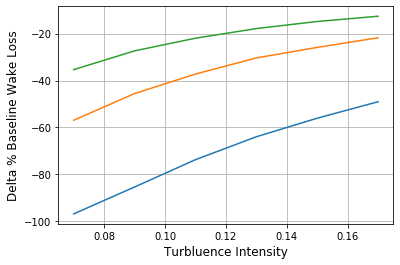

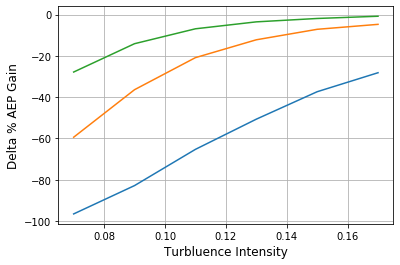

In [94]:
test = pd.DataFrame([])
test['y_p4'] = np.diff(ti_4['Wk_Loss_Baseline']) / np.diff(ti_4['TI'])
test['x_p4'] = (np.array(ti_4['TI'])[:-1] + np.array(ti_4['TI'])[1:]) / 2

test['y_p7'] = np.diff(ti_7['Wk_Loss_Baseline']) / np.diff(ti_7['TI'])
test['x_p7'] = (np.array(ti_7['TI'])[:-1] + np.array(ti_7['TI'])[1:]) / 2

test['y_p10'] = np.diff(ti_10['Wk_Loss_Baseline']) / np.diff(ti_10['TI'])
test['x_p10'] = (np.array(ti_10['TI'])[:-1] + np.array(ti_10['TI'])[1:]) / 2


#plt.plot(ti_4['TI'], ti_4['Wk_Loss_Baseline'], 'r')
plt.xlabel('Turbluence Intensity', fontsize=12)
plt.ylabel('Delta % Baseline Wake Loss', fontsize=12)
plt.plot(test['x_p4'], test['y_p4'])
plt.plot(test['x_p7'], test['y_p7'])
plt.plot(test['x_p10'], test['y_p10'])
plt.grid()
plt.show()

test1 = pd.DataFrame([])
test1['y_p4'] = np.diff(ti_4['AEP_Gain_Opt']) / np.diff(ti_4['TI'])
test1['x_p4'] = (np.array(ti_4['TI'])[:-1] + np.array(ti_4['TI'])[1:]) / 2

test1['y_p7'] = np.diff(ti_7['AEP_Gain_Opt']) / np.diff(ti_7['TI'])
test1['x_p7'] = (np.array(ti_7['TI'])[:-1] + np.array(ti_7['TI'])[1:]) / 2

test1['y_p10'] = np.diff(ti_10['AEP_Gain_Opt']) / np.diff(ti_10['TI'])
test1['x_p10'] = (np.array(ti_10['TI'])[:-1] + np.array(ti_10['TI'])[1:]) / 2


#plt.plot(ti_4['TI'], ti_4['Wk_Loss_Baseline'], 'r')
plt.xlabel('Turbluence Intensity', fontsize=12)
plt.ylabel('Delta % AEP Gain', fontsize=12)
plt.plot(test1['x_p4'], test1['y_p4'])
plt.plot(test1['x_p7'], test1['y_p7'])
plt.plot(test1['x_p10'], test1['y_p10'])
plt.grid()
plt.show()

## Function to find pred runtime

In [ ]:
## Using data for a runtime on 10 nodes for the farms


In [137]:
run_data = pd.read_excel(r'C:\Users\dbensaso\floris\examples\optimization\scipy\US_2020_Farm_List.xlsx',sheet_name='Runtimes')
run_data.sort_values(by ='# Turbine', inplace= True)

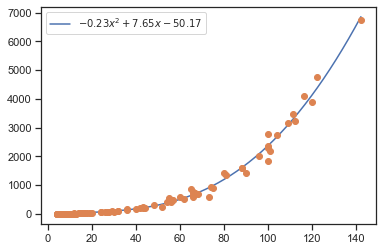

In [132]:
x =run_data['# Turbine'].tolist()
x_o =run_data['# Turbine'].tolist()
y = run_data['Runtime (min)'].tolist()
#plt.plot(x, y, 'o')


p = np.polyfit(x,y,4)
f = np.poly1d(p)

x_new = np.linspace(x[0], x[-1], 50)
y_new = f(x_new)

x = symbols("x")
poly = sum(S("{:6.2f}".format(v))*x**i for i, v in enumerate(p[::-1]))
eq_latex = printing.latex(poly)

plt.plot(x_new, y_new, label="${}$".format(eq_latex))
plt.plot(x_o, y, 'o')
plt.legend(fontsize="small")
plt.show()
#plt.plot(x, y1, '-')

In [138]:
predicted_runtime = []
t_class = []
for i in range(len(run_data['# Turbine'])): 
    n = run_data['# Turbine'][i]
    R = ((0.0027 * (n**3)) - (0.054 * n**2) + (2.4211 *n) - 14.004) / 60
    predicted_runtime.append(R)
    if R <= 4 :
        t_class.append('Short')
    elif R > 2 and R <=48:
        t_class.append('Standard')
    else:
        t_class.append('Long')
run_data['P_rutime'] = predicted_runtime
run_data['Class'] = t_class

In [139]:
run_data

,Farm that run,# Turbine,Runtime (min),P_rutime,Class
61,Future Generation Wind,4,1,0.089670,Short
63,Georgia Mountain,4,1,0.125117,Short
78,Lamar Municipal,4,2,0.463770,Short
36,Coastal Energy,4,1,0.413563,Short
40,Creston Ridge,4,2,11.964397,Standard
74,Jericho Mountain,5,2,20.274733,Standard
34,Durbin Creek,5,2,0.198980,Short
30,Chopin,6,2,1.277403,Short
62,Galactic Wind,6,2,0.161463,Short
69,Harbor Wind,6,2,0.998263,Short


## Different way of getting turb data 

In [ ]:
## After the rated wind speed keep at rated power

def cp_for_any_turb(U_turb_norm,U_turb_rated,tf)  :
#    tf= pd.read_pickle('/home/dbensaso/WakeSteering_US/Working_dir_WS_US/Wind_Cp_look_up_table')
    f = interpolate.interp1d(tf['U/Urated'], tf['C_p'], fill_value='extrapolate')
    _cp= []
    for i in range(len(U_turb_norm)):
        ws = tf['Set_Wind_Speed'][i] 
        if U_turb_norm[i] < min(tf['U/Urated']):
            _cp.append(0.0) 
        
        else:
            _p= f(U_turb_norm[i])
            
            if _p.size > 1:
                _p = _p[0]
            
            if ws >= U_turb_rated:
                _p = f(U_turb_rated)
                
            _cp.append(float(_p))
    return _cp

def ct_for_any_turb(U_turb_norm,tf)  :
#    tf= pd.read_pickle('/home/dbensaso/WakeSteering_US/Working_dir_WS_US/Wind_Cp_look_up_table')
    f = interpolate.interp1d(tf['U/Urated'], tf['C_t'], fill_value='extrapolate')
    _ct= []
    for i in U_turb_norm:
        if i < min(tf['U/Urated']):
            _ct.append(0.0)
        else:
            _t= f(i)
            if _t.size > 1:
                _t = _t[0]
            _ct.append(float(_t))
    return _ct

## Looking at Scatter Plots

In [238]:
excel_list_farms = pd.read_excel(r'C:\Users\dbensaso\floris\examples\optimization\scipy\ti_8_farm_results.xlsx')
excel_list_farms

,Farm Name,#Turbine,Farm_lat,Farm_lon,AEP_No_Wake,AEP_Baseline,AEP_Opt,%_Baseline,%_Opt,Wk_Loss_Baseline,...,Loss_Red_Opt,avg_ws,SP,Avg_yaw,Power Density (MW/km2),Eric_std,Eric_var,var*cos2 (version1),version2 (shit),version 3 (take out dir that are less than 0.7) also shit
0,Cold Springs,60,43.033497,-115.441547,424.095232,404.986142,405.961261,95.494151,95.724080,4.505849,...,5.102905,6.313067,287.074890,1.210735,2.450635,0.908321,0.338022,0.174018,0.108297,0.096309
1,Lakeswind,32,46.713609,-96.238153,206.937603,202.032545,202.602027,97.629692,97.904887,2.370308,...,11.610086,7.727492,280.603756,1.148817,0.753431,1.648858,0.743177,0.380460,0.330626,0.247612
2,Tucannon River,116,46.433366,-118.046519,955.133582,916.053068,918.979416,95.908372,96.214753,4.091628,...,7.487998,6.460590,251.067469,1.485203,2.810045,1.206853,0.517245,0.296547,0.235350,0.200797
3,Red Horse 2,15,32.288584,-110.088399,110.118572,107.762087,108.158867,97.860047,98.220368,2.139953,...,16.837794,6.560357,210.452817,1.306638,4.355619,1.376044,0.611999,0.331511,0.258445,0.181338
4,Hawkeye,15,42.931152,-92.029459,148.962491,145.164519,145.717398,97.450383,97.821537,2.549617,...,14.557223,7.664999,318.309886,1.420166,1.478740,1.866423,0.824790,0.391960,0.364811,0.271768
5,Border Winds Project,75,48.964765,-99.602687,706.557938,681.114909,683.884258,96.399017,96.790967,3.600983,...,10.884509,7.958366,254.647909,1.609050,1.323043,1.849406,0.819161,0.470803,0.431027,0.286261
6,"Beethoven Wind, LLC",43,43.175031,-98.076880,367.235336,354.046198,355.527706,96.408533,96.811955,3.591467,...,11.232790,8.356914,311.202690,1.796633,2.183039,1.590493,0.717714,0.396882,0.347037,0.235101
7,Fourmile Ridge,16,39.642247,-79.004078,184.377849,180.511734,181.268447,97.903157,98.313571,2.096843,...,19.572950,8.734723,318.309886,1.323699,5.391413,1.367115,0.607218,0.275534,0.217390,0.153381
8,Cactus Flats,42,31.111537,-100.017617,731.988989,703.799388,706.859727,96.148904,96.566989,3.851096,...,10.856270,8.529356,276.686598,1.886121,2.523232,1.255084,0.545073,0.276822,0.206638,0.145084
9,Blackwell,26,36.850940,-97.426215,260.892929,251.392044,252.577564,96.358320,96.812729,3.641680,...,12.478002,7.404592,251.067469,1.932694,2.223160,1.424967,0.637694,0.354452,0.284725,0.241681


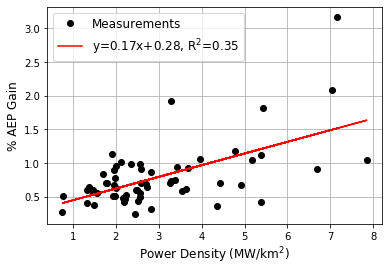

In [77]:
plt.plot(excel_list_farms['Power Density (W/m2)'], excel_list_farms['AEP_Gain_Opt'], 'ko',label='Measurements')

slope, intercept, r_value, p_value, std_err = stats.linregress(excel_list_farms['Power Density (W/m2)'],excel_list_farms['AEP_Gain_Opt'])

line = slope*excel_list_farms['Power Density (W/m2)']+intercept

r2_value= round(r_value**2, 2)

plt.plot(excel_list_farms['Power Density (W/m2)'], line, 'r-', label='y={:.2f}x+{:.2f}, R$^2$={}'.format(slope,intercept,r2_value))

plt.xlabel('Power Density (MW/km$^2$)', fontsize=12)
plt.ylabel('% AEP Gain', fontsize=12)
plt.legend(fontsize=12)
plt.grid()


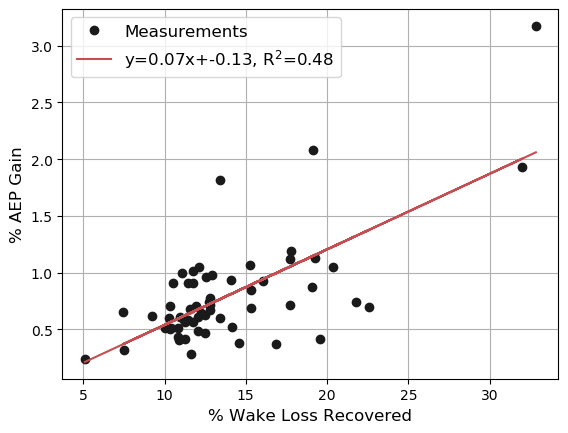

In [240]:
plt.plot(excel_list_farms['Loss_Red_Opt'], excel_list_farms['AEP_Gain_Opt'], 'ko',label='Measurements')

slope, intercept, r_value, p_value, std_err = stats.linregress(excel_list_farms['Loss_Red_Opt'],excel_list_farms['AEP_Gain_Opt'])

line = slope*excel_list_farms['Loss_Red_Opt']+intercept

r2_value= round(r_value**2, 2)

plt.plot(excel_list_farms['Loss_Red_Opt'], line, 'r-', label='y={:.2f}x+{:.2f}, R$^2$={}'.format(slope,intercept,r2_value))

plt.xlabel('% Wake Loss Recovered', fontsize=12)
plt.ylabel('% AEP Gain', fontsize=12)
plt.legend(fontsize=12)
plt.grid()


0.5378097241467404

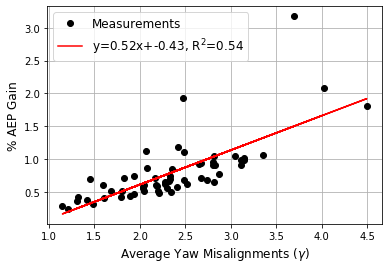

In [78]:
plt.plot(excel_list_farms['Avg_yaw'], excel_list_farms['AEP_Gain_Opt'], 'ko',label='Measurements')

slope, intercept, r_value, p_value, std_err = stats.linregress(excel_list_farms['Avg_yaw'],excel_list_farms['AEP_Gain_Opt'])

line = slope*excel_list_farms['Avg_yaw']+intercept
r2_value= round(r_value**2, 2)

plt.plot(excel_list_farms['Avg_yaw'], line, 'r-', label='y={:.2f}x+{:.2f}, R$^2$={}'.format(slope,intercept,r2_value))

plt.xlabel('Average Yaw Misalignments ($\gamma$)', fontsize=12)
plt.ylabel('% AEP Gain', fontsize=12)
plt.legend(fontsize=12)
plt.grid()
r_value**2

In [203]:
z
from scipy import stats
slope, intercept, r_value, p_value, std_err = stats.linregress(excel_list_farms['Avg_yaw'],excel_list_farms['AEP_Gain_Opt'])


0.524089797993041

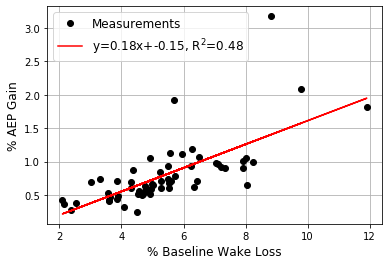

In [82]:
plt.plot(excel_list_farms['Wk_Loss_Baseline'], excel_list_farms['AEP_Gain_Opt'], 'ko',label='Measurements')

slope, intercept, r_value, p_value, std_err = stats.linregress(excel_list_farms['Wk_Loss_Baseline'],excel_list_farms['AEP_Gain_Opt'])

line = slope*excel_list_farms['Wk_Loss_Baseline']+intercept
r2_value= round(r_value**2, 2)

plt.plot(excel_list_farms['Wk_Loss_Baseline'], line, 'r-', label='y={:.2f}x+{:.2f}, R$^2$={}'.format(slope,intercept,r2_value))

plt.xlabel('% Baseline Wake Loss', fontsize=12)
plt.ylabel('% AEP Gain', fontsize=12)
plt.legend(fontsize=12)
plt.grid()

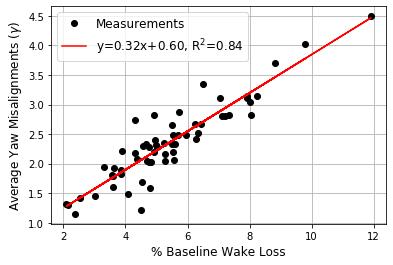

In [84]:
plt.plot(excel_list_farms['Wk_Loss_Baseline'], excel_list_farms['Avg_yaw'], 'ko',label='Measurements')


slope, intercept, r_value, p_value, std_err = stats.linregress(excel_list_farms['Wk_Loss_Baseline'],excel_list_farms['Avg_yaw'])

line = slope*excel_list_farms['Wk_Loss_Baseline']+intercept
r2_value= round(r_value**2, 2)
plt.plot(excel_list_farms['Wk_Loss_Baseline'], line, 'r-', label='y={:.2f}x+{:.2f}, R$^2$={}'.format(slope,intercept,r2_value))

plt.xlabel('% Baseline Wake Loss', fontsize=12)
plt.ylabel('Average Yaw Misalignments ($\gamma$)', fontsize=12)
plt.legend(fontsize=12)
plt.grid()

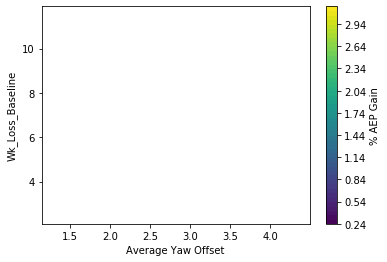

In [194]:
Z = excel_list_farms.pivot_table(index='Avg_yaw', columns='Wk_Loss_Baseline', values='AEP_Gain_Opt').T.values

X_unique = np.sort(excel_list_farms.Avg_yaw.unique())
Y_unique = np.sort(excel_list_farms.Wk_Loss_Baseline.unique())
X, Y = np.meshgrid(X_unique, Y_unique)

fig,ax=plt.subplots(1,1)
cp = ax.contourf(X, Y, Z, 50)
v = fig.colorbar(cp) # Add a colorbar to a plot
v.set_label('% AEP Gain')
#ax.set_title('AEP_Opt avg_ws = 6, D=140m')
ax.set_xlabel('Average Yaw Offset')
ax.set_ylabel('Wk_Loss_Baseline')
plt.show()


## Anwser Questions of Parametric Study

In [139]:
parametric_study = pd.read_excel(r'C:\Users\dbensaso\floris\examples\optimization\scipy\Copy of BOS LCOE Parametric_Study_Results_Base_and_Opt 5 6 15 lcoe correct plots 8.4.20final.xlsx',\
                                 sheet_name='Final Data')


### Question 1: Relative Effects of parameters on the AEP gain (diff between opt and baseline) 

c:\users\dbensaso\appdata\local\continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


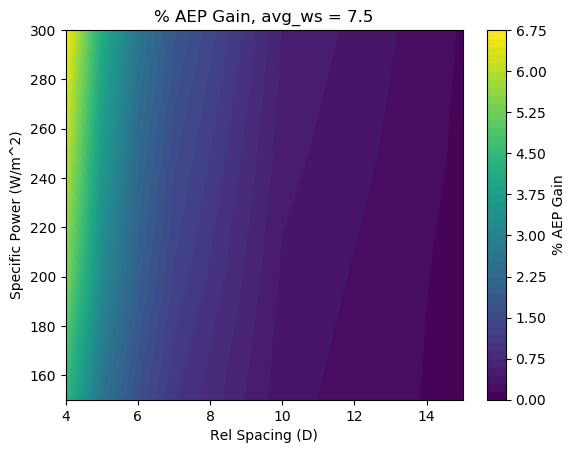

c:\users\dbensaso\appdata\local\continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


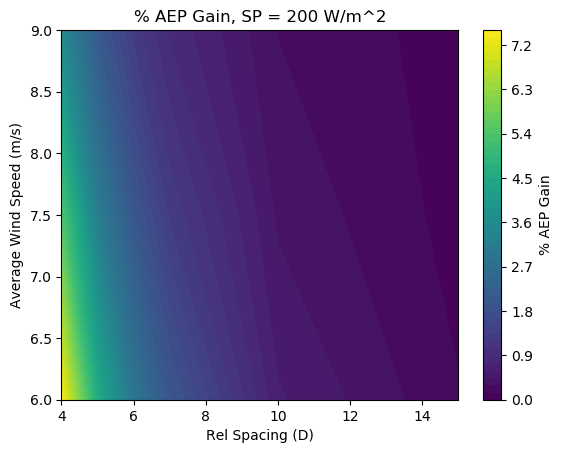

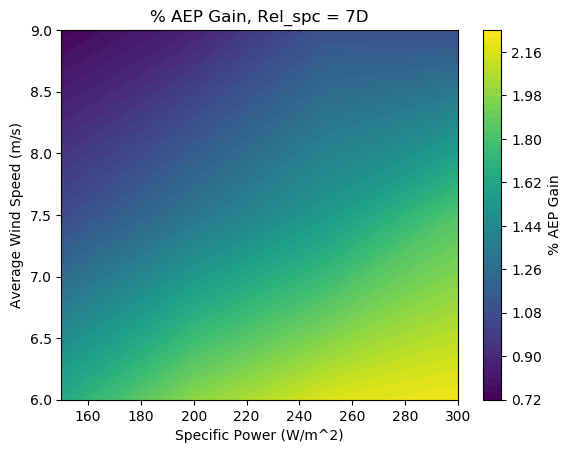

In [140]:
### Look at effect of spc and avg ws, spc and SP, Sp and avg ws. 
case1 = parametric_study[(parametric_study['Avg_ws'] == 7.5)]
case1.sort_values(by ='Turb_spc_rel', inplace= True)
Z = case1.pivot_table(index='Turb_spc_rel', columns='Specific_Power', values='AEP_Gain_Opt').T.values
X_unique = np.sort(case1.Turb_spc_rel.unique())
Y_unique = np.sort(case1.Specific_Power.unique())
X, Y = np.meshgrid(X_unique, Y_unique)
fig,ax=plt.subplots(1,1)
cp = ax.contourf(X, Y, Z, 50)
v = fig.colorbar(cp) # Add a colorbar to a plot
v.set_label('% AEP Gain')
ax.set_title('% AEP Gain, avg_ws = 7.5')
ax.set_xlabel('Rel Spacing (D)')
ax.set_ylabel('Specific Power (W/m^2)')
plt.show()

case2 = parametric_study[(parametric_study['Specific_Power'] == 200)]
case2.sort_values(by ='Turb_spc_rel', inplace= True)
Z = case2.pivot_table(index='Turb_spc_rel', columns='Avg_ws', values='AEP_Gain_Opt').T.values
X_unique = np.sort(case2.Turb_spc_rel.unique())
Y_unique = np.sort(case2.Avg_ws.unique())
X, Y = np.meshgrid(X_unique, Y_unique)
fig,ax=plt.subplots(1,1)
cp = ax.contourf(X, Y, Z, 50)
v = fig.colorbar(cp) # Add a colorbar to a plot
v.set_label('% AEP Gain')
ax.set_title('% AEP Gain, SP = 200 W/m^2')
ax.set_xlabel('Rel Spacing (D)')
ax.set_ylabel('Average Wind Speed (m/s)')
plt.show()

case3 = parametric_study[(parametric_study['Turb_spc_rel'] == 7)]
#case3.sort_values(by ='Turb_spc_rel', inplace= True)
Z = case3.pivot_table(index='Specific_Power', columns='Avg_ws', values='AEP_Gain_Opt').T.values
X_unique = np.sort(case3.Specific_Power.unique())
Y_unique = np.sort(case3.Avg_ws.unique())
X, Y = np.meshgrid(X_unique, Y_unique)
fig,ax=plt.subplots(1,1)
cp = ax.contourf(X, Y, Z, 50)
v = fig.colorbar(cp) # Add a colorbar to a plot
v.set_label('% AEP Gain')
ax.set_title('% AEP Gain, Rel_spc = 7D')
ax.set_xlabel('Specific Power (W/m^2)')
ax.set_ylabel('Average Wind Speed (m/s)')
plt.show()

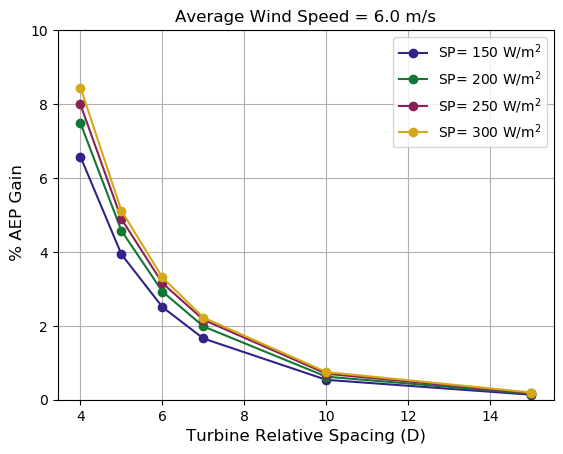

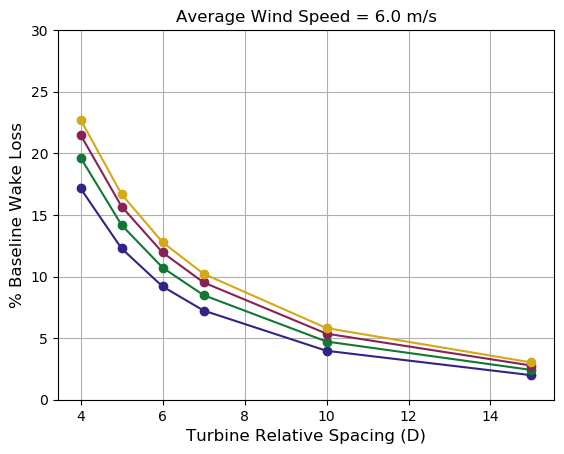

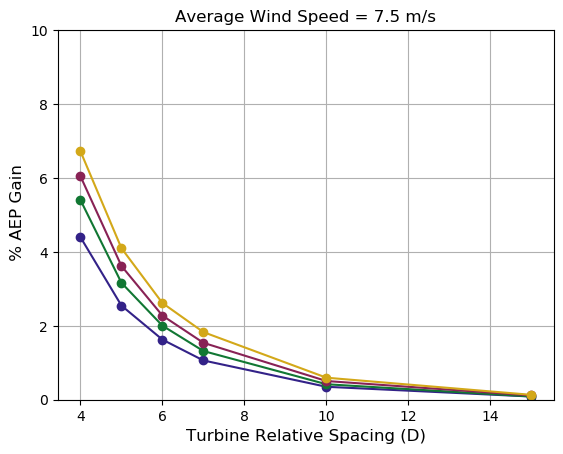

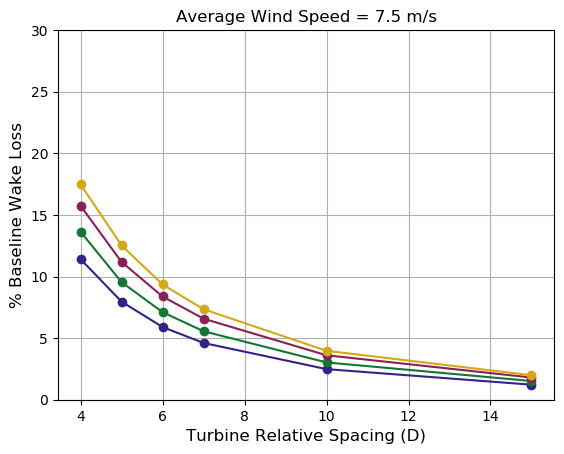

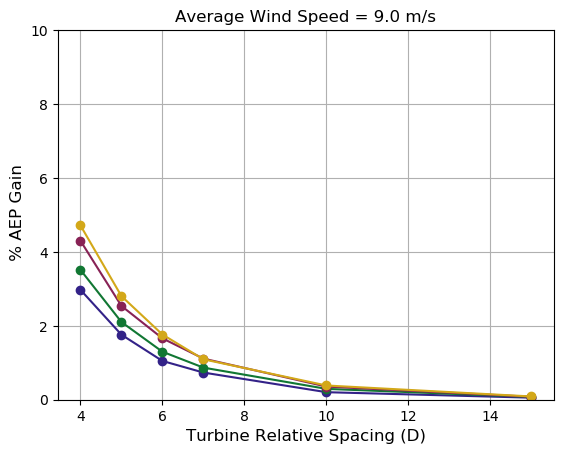

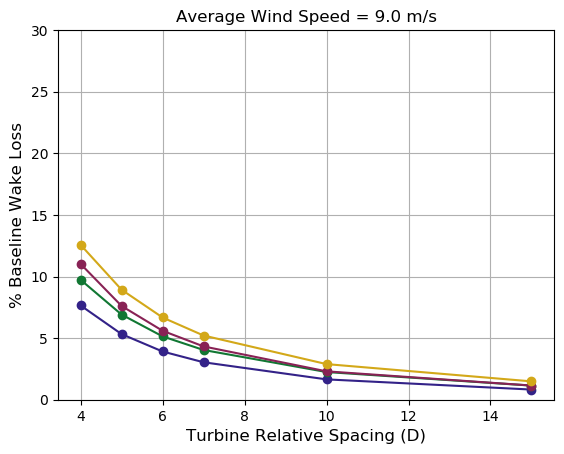

In [225]:
c1 = parametric_study[(parametric_study['Avg_ws'] == 6.0) & \
                  (parametric_study['Specific_Power'] == 150)]
c2 = parametric_study[(parametric_study['Avg_ws'] == 6.0) & \
                  (parametric_study['Specific_Power'] == 200)]
c3 = parametric_study[(parametric_study['Avg_ws'] == 6.0) & \
                  (parametric_study['Specific_Power'] == 250)]
c4 = parametric_study[(parametric_study['Avg_ws'] == 6.0) & \
                  (parametric_study['Specific_Power'] == 300)]


c5 = parametric_study[(parametric_study['Avg_ws'] == 7.5) & \
                  (parametric_study['Specific_Power'] == 150)]
c6 = parametric_study[(parametric_study['Avg_ws'] == 7.5) & \
                  (parametric_study['Specific_Power'] == 200)]
c7 = parametric_study[(parametric_study['Avg_ws'] == 7.5) & \
                  (parametric_study['Specific_Power'] == 250)]
c8 = parametric_study[(parametric_study['Avg_ws'] == 7.5) & \
                  (parametric_study['Specific_Power'] == 300)]

c9 = parametric_study[(parametric_study['Avg_ws'] == 9.0) & \
                  (parametric_study['Specific_Power'] == 150)]
c10 = parametric_study[(parametric_study['Avg_ws'] == 9.0) & \
                  (parametric_study['Specific_Power'] == 200)]
c11 = parametric_study[(parametric_study['Avg_ws'] == 9.0) & \
                  (parametric_study['Specific_Power'] == 250)]
c12 = parametric_study[(parametric_study['Avg_ws'] == 9.0) & \
                  (parametric_study['Specific_Power'] == 300)]

plt.plot(c1['Turb_spc_rel'], c1['AEP_Gain_Opt'], 'o-',label ='SP= 150 W/m$^2$')
plt.plot(c2['Turb_spc_rel'], c2['AEP_Gain_Opt'], 'o-',label ='SP= 200 W/m$^2$')
plt.plot(c3['Turb_spc_rel'], c3['AEP_Gain_Opt'], 'o-',label ='SP= 250 W/m$^2$')
plt.plot(c4['Turb_spc_rel'], c4['AEP_Gain_Opt'], 'o-',label ='SP= 300 W/m$^2$')
plt.xlabel('Turbine Relative Spacing (D)', fontsize=12)
plt.ylabel(' % AEP Gain', fontsize=12)
plt.ylim((0,10))

plt.grid()
plt.title('Average Wind Speed = 6.0 m/s',fontsize=12)
plt.legend()
plt.show()

plt.plot(c1['Turb_spc_rel'], c1['Wk_Loss_Baseline'], 'o-',label ='SP= 150 W/m$^2$')
plt.plot(c2['Turb_spc_rel'], c2['Wk_Loss_Baseline'], 'o-',label ='SP= 200 W/m$^2$')
plt.plot(c3['Turb_spc_rel'], c3['Wk_Loss_Baseline'], 'o-',label ='SP= 250 W/m$^2$')
plt.plot(c4['Turb_spc_rel'], c4['Wk_Loss_Baseline'], 'o-',label ='SP= 300 W/m$^2$')
plt.xlabel('Turbine Relative Spacing (D)', fontsize=12)
plt.ylabel('% Baseline Wake Loss', fontsize=12)
plt.grid()
plt.ylim((0,30))

plt.title('Average Wind Speed = 6.0 m/s',fontsize=12)
#plt.legend()
plt.show()

plt.plot(c5['Turb_spc_rel'], c5['AEP_Gain_Opt'], 'o-',label ='SP= 150 W/m$^2$')
plt.plot(c6['Turb_spc_rel'], c6['AEP_Gain_Opt'], 'o-',label ='SP= 200 W/m$^2$')
plt.plot(c7['Turb_spc_rel'], c7['AEP_Gain_Opt'], 'o-',label ='SP= 250 W/m$^2$')
plt.plot(c8['Turb_spc_rel'], c8['AEP_Gain_Opt'], 'o-',label ='SP= 300 W/m$^2$')
plt.xlabel('Turbine Relative Spacing (D)', fontsize=12)
plt.ylabel(' % AEP Gain', fontsize=12)
plt.grid()
plt.title('Average Wind Speed = 7.5 m/s',fontsize=12)
plt.ylim((0,10))

#plt.legend()
plt.show()

plt.plot(c5['Turb_spc_rel'], c5['Wk_Loss_Baseline'], 'o-',label ='SP= 150 W/m$^2$')
plt.plot(c6['Turb_spc_rel'], c6['Wk_Loss_Baseline'], 'o-',label ='SP= 200 W/m$^2$')
plt.plot(c7['Turb_spc_rel'], c7['Wk_Loss_Baseline'], 'o-',label ='SP= 250 W/m$^2$')
plt.plot(c8['Turb_spc_rel'], c8['Wk_Loss_Baseline'], 'o-',label ='SP= 300 W/m$^2$')
plt.xlabel('Turbine Relative Spacing (D)', fontsize=12)
plt.ylabel('% Baseline Wake Loss', fontsize=12)
plt.grid()
plt.ylim((0,30))

plt.title('Average Wind Speed = 7.5 m/s',fontsize=12)
#plt.legend()
plt.show()

plt.plot(c9['Turb_spc_rel'], c9['AEP_Gain_Opt'], 'o-',label ='SP= 150 W/m$^2$')
plt.plot(c10['Turb_spc_rel'], c10['AEP_Gain_Opt'], 'o-',label ='SP= 200 W/m$^2$')
plt.plot(c11['Turb_spc_rel'], c11['AEP_Gain_Opt'], 'o-',label ='SP= 250 W/m$^2$')
plt.plot(c12['Turb_spc_rel'], c12['AEP_Gain_Opt'], 'o-',label ='SP= 300 W/m$^2$')
plt.xlabel('Turbine Relative Spacing (D)', fontsize=12)
plt.ylabel(' % AEP Gain', fontsize=12)
plt.grid()
plt.title('Average Wind Speed = 9.0 m/s',fontsize=12)
#plt.legend()
plt.ylim((0,10))

plt.show()

plt.plot(c9['Turb_spc_rel'], c9['Wk_Loss_Baseline'], 'o-',label ='SP= 150 W/m$^2$')
plt.plot(c10['Turb_spc_rel'], c10['Wk_Loss_Baseline'], 'o-',label ='SP= 200 W/m$^2$')
plt.plot(c11['Turb_spc_rel'], c11['Wk_Loss_Baseline'], 'o-',label ='SP= 250 W/m$^2$')
plt.plot(c12['Turb_spc_rel'], c12['Wk_Loss_Baseline'], 'o-',label ='SP= 300 W/m$^2$')
plt.xlabel('Turbine Relative Spacing (D)', fontsize=12)
plt.ylabel('% Baseline Wake Loss', fontsize=12)
plt.grid()
plt.ylim((0,30))

plt.title('Average Wind Speed = 9.0 m/s',fontsize=12)
#plt.legend()
plt.show()

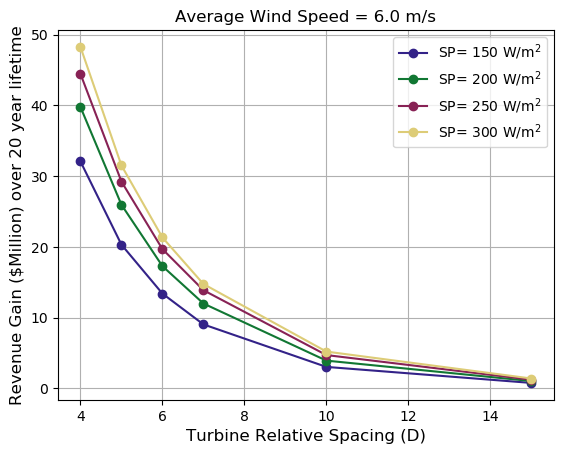

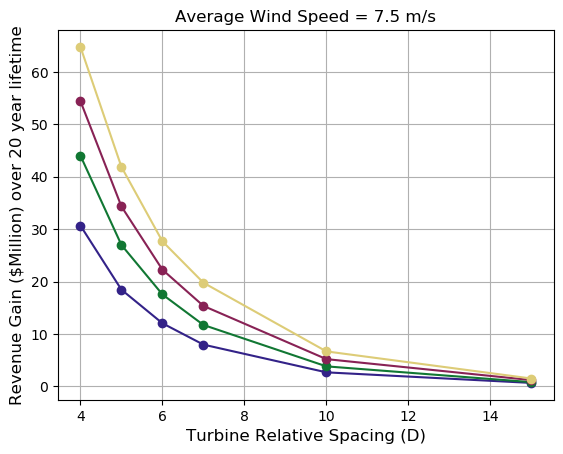

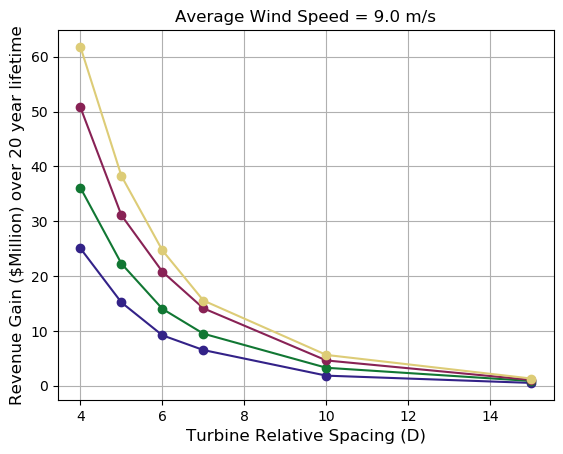

In [144]:
c1 = parametric_study[(parametric_study['Avg_ws'] == 6.0) & \
                  (parametric_study['Specific_Power'] == 150)]
c2 = parametric_study[(parametric_study['Avg_ws'] == 6.0) & \
                  (parametric_study['Specific_Power'] == 200)]
c3 = parametric_study[(parametric_study['Avg_ws'] == 6.0) & \
                  (parametric_study['Specific_Power'] == 250)]
c4 = parametric_study[(parametric_study['Avg_ws'] == 6.0) & \
                  (parametric_study['Specific_Power'] == 300)]


c5 = parametric_study[(parametric_study['Avg_ws'] == 7.5) & \
                  (parametric_study['Specific_Power'] == 150)]
c6 = parametric_study[(parametric_study['Avg_ws'] == 7.5) & \
                  (parametric_study['Specific_Power'] == 200)]
c7 = parametric_study[(parametric_study['Avg_ws'] == 7.5) & \
                  (parametric_study['Specific_Power'] == 250)]
c8 = parametric_study[(parametric_study['Avg_ws'] == 7.5) & \
                  (parametric_study['Specific_Power'] == 300)]

c9 = parametric_study[(parametric_study['Avg_ws'] == 9.0) & \
                  (parametric_study['Specific_Power'] == 150)]
c10 = parametric_study[(parametric_study['Avg_ws'] == 9.0) & \
                  (parametric_study['Specific_Power'] == 200)]
c11 = parametric_study[(parametric_study['Avg_ws'] == 9.0) & \
                  (parametric_study['Specific_Power'] == 250)]
c12 = parametric_study[(parametric_study['Avg_ws'] == 9.0) & \
                  (parametric_study['Specific_Power'] == 300)]

plt.plot(c1['Turb_spc_rel'], c1['revenue gain mill over lifetime of 20 years'], 'o-',label ='SP= 150 W/m$^2$')
plt.plot(c2['Turb_spc_rel'], c2['revenue gain mill over lifetime of 20 years'], 'o-',label ='SP= 200 W/m$^2$')
plt.plot(c3['Turb_spc_rel'], c3['revenue gain mill over lifetime of 20 years'], 'o-',label ='SP= 250 W/m$^2$')
plt.plot(c4['Turb_spc_rel'], c4['revenue gain mill over lifetime of 20 years'], 'o-',label ='SP= 300 W/m$^2$')
plt.xlabel('Turbine Relative Spacing (D)', fontsize=12)
plt.ylabel('Revenue Gain ($Million) over 20 year lifetime', fontsize=12)
#plt.ylim((0,10))

plt.grid()
plt.title('Average Wind Speed = 6.0 m/s',fontsize=12)
plt.legend()
plt.show()



plt.plot(c5['Turb_spc_rel'], c5['revenue gain mill over lifetime of 20 years'], 'o-',label ='SP= 150 W/m$^2$')
plt.plot(c6['Turb_spc_rel'], c6['revenue gain mill over lifetime of 20 years'], 'o-',label ='SP= 200 W/m$^2$')
plt.plot(c7['Turb_spc_rel'], c7['revenue gain mill over lifetime of 20 years'], 'o-',label ='SP= 250 W/m$^2$')
plt.plot(c8['Turb_spc_rel'], c8['revenue gain mill over lifetime of 20 years'], 'o-',label ='SP= 300 W/m$^2$')
plt.xlabel('Turbine Relative Spacing (D)', fontsize=12)
plt.ylabel('Revenue Gain ($Million) over 20 year lifetime', fontsize=12)
plt.grid()
plt.title('Average Wind Speed = 7.5 m/s',fontsize=12)
#plt.ylim((0,10))

#plt.legend()
plt.show()



plt.plot(c9['Turb_spc_rel'], c9['revenue gain mill over lifetime of 20 years'], 'o-',label ='SP= 150 W/m$^2$')
plt.plot(c10['Turb_spc_rel'], c10['revenue gain mill over lifetime of 20 years'], 'o-',label ='SP= 200 W/m$^2$')
plt.plot(c11['Turb_spc_rel'], c11['revenue gain mill over lifetime of 20 years'], 'o-',label ='SP= 250 W/m$^2$')
plt.plot(c12['Turb_spc_rel'], c12['revenue gain mill over lifetime of 20 years'], 'o-',label ='SP= 300 W/m$^2$')
plt.xlabel('Turbine Relative Spacing (D)', fontsize=12)
plt.ylabel('Revenue Gain ($Million) over 20 year lifetime', fontsize=12)
plt.grid()
plt.title('Average Wind Speed = 9.0 m/s',fontsize=12)
#plt.legend()
#plt.ylim((0,10))

plt.show()




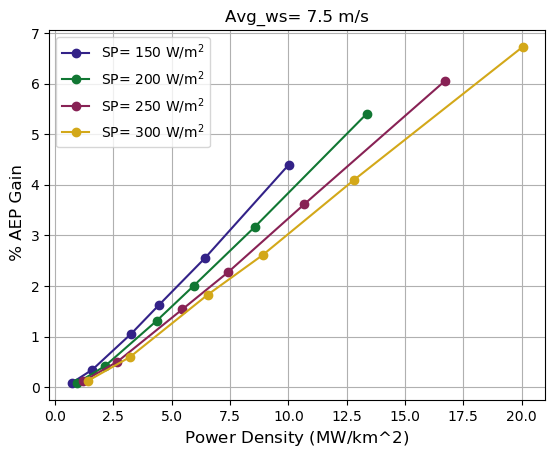

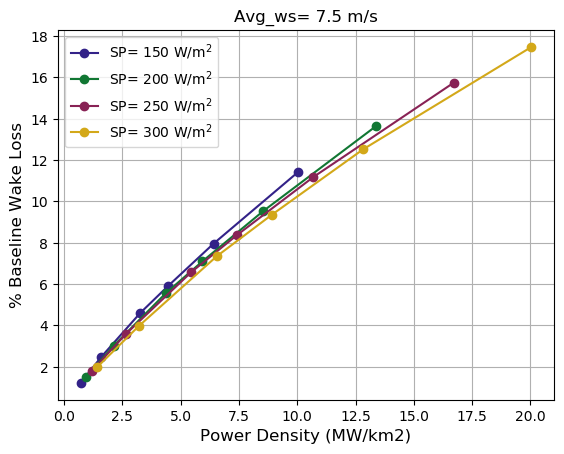

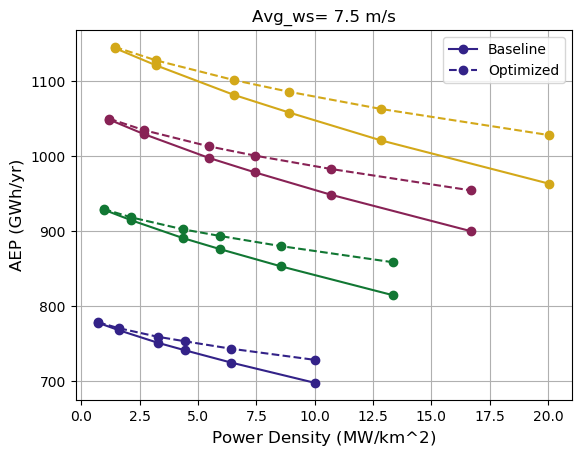

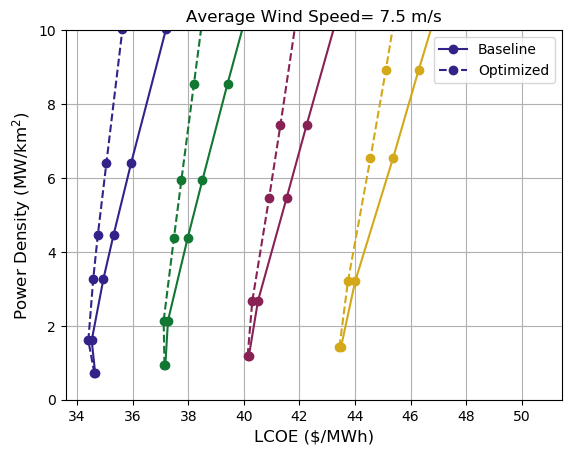

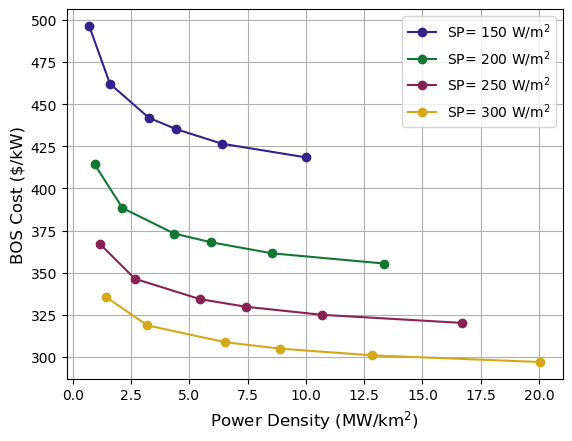

In [227]:
c1 = parametric_study[(parametric_study['Avg_ws'] == 7.5) & \
                  (parametric_study['Specific_Power'] == 150)]
c2 = parametric_study[(parametric_study['Avg_ws'] == 7.5) & \
                  (parametric_study['Specific_Power'] == 200)]
c3 = parametric_study[(parametric_study['Avg_ws'] == 7.5) & \
                  (parametric_study['Specific_Power'] == 250)]
c4 = parametric_study[(parametric_study['Avg_ws'] == 7.5) & \
                  (parametric_study['Specific_Power'] == 300)]

plt.plot(c1['Power Density (MW/km2)'], c1['AEP_Gain_Opt'], 'o-',label ='SP= 150 W/m$^2$')
plt.plot(c2['Power Density (MW/km2)'], c2['AEP_Gain_Opt'], 'o-',label ='SP= 200 W/m$^2$')
plt.plot(c3['Power Density (MW/km2)'], c3['AEP_Gain_Opt'], 'o-',label ='SP= 250 W/m$^2$')
plt.plot(c4['Power Density (MW/km2)'], c4['AEP_Gain_Opt'], 'o-',label ='SP= 300 W/m$^2$')
plt.xlabel('Power Density (MW/km^$2$)', fontsize=12)
plt.ylabel(' % AEP Gain', fontsize=12)
plt.grid()
plt.title('Avg_ws= 7.5 m/s',fontsize=12)
plt.legend()
plt.show()

plt.plot(c1['Power Density (MW/km2)'], c1['Wk_Loss_Baseline'], 'o-',label ='SP= 150 W/m$^2$')
plt.plot(c2['Power Density (MW/km2)'], c2['Wk_Loss_Baseline'], 'o-',label ='SP= 200 W/m$^2$')
plt.plot(c3['Power Density (MW/km2)'], c3['Wk_Loss_Baseline'], 'o-',label ='SP= 250 W/m$^2$')
plt.plot(c4['Power Density (MW/km2)'], c4['Wk_Loss_Baseline'], 'o-',label ='SP= 300 W/m$^2$')
plt.xlabel('Power Density (MW/km2)', fontsize=12)
plt.ylabel('% Baseline Wake Loss', fontsize=12)
plt.grid()
plt.title('Avg_ws= 7.5 m/s',fontsize=12)

plt.legend()
plt.show()

plt.plot(c1['Power Density (MW/km2)'], c1['AEP_Baseline gwh/yr'], 'o-',color='C0',label ='Baseline')
plt.plot(c1['Power Density (MW/km2)'], c1['AEP_Opt GWh/yr'], 'o--',color='C0',label ='Optimized')

plt.plot(c2['Power Density (MW/km2)'], c2['AEP_Baseline gwh/yr'], 'o-',color='C1')
plt.plot(c2['Power Density (MW/km2)'], c2['AEP_Opt GWh/yr'], 'o--',color='C1')

plt.plot(c3['Power Density (MW/km2)'], c3['AEP_Baseline gwh/yr'], 'o-',color='C2')
plt.plot(c3['Power Density (MW/km2)'], c3['AEP_Opt GWh/yr'], 'o--',color='C2')

plt.plot(c4['Power Density (MW/km2)'], c4['AEP_Baseline gwh/yr'], 'o-',color='C3')
plt.plot(c4['Power Density (MW/km2)'], c4['AEP_Opt GWh/yr'], 'o--',color='C3')

plt.xlabel('Power Density (MW/km^$2$)', fontsize=12)
plt.ylabel('AEP (GWh/yr)', fontsize=12)
plt.grid()
plt.title('Avg_ws= 7.5 m/s',fontsize=12)

plt.legend()
plt.show()

plt.plot(c1['Baseline wake LCOE  ($/MWh)'], c1['Power Density (MW/km2)'], 'o-',color='C0',label ='Baseline')
plt.plot(c1['LCOE Wake Steering ($/MWh)'], c1['Power Density (MW/km2)'], 'o--',color='C0',label ='Optimized')

plt.plot(c2['Baseline wake LCOE  ($/MWh)'], c2['Power Density (MW/km2)'], 'o-',color='C1')
plt.plot(c2['LCOE Wake Steering ($/MWh)'], c2['Power Density (MW/km2)'], 'o--',color='C1')

plt.plot(c3['Baseline wake LCOE  ($/MWh)'], c3['Power Density (MW/km2)'], 'o-',color='C2')
plt.plot(c3['LCOE Wake Steering ($/MWh)'], c3['Power Density (MW/km2)'], 'o--',color='C2')

plt.plot(c4['Baseline wake LCOE  ($/MWh)'], c4['Power Density (MW/km2)'], 'o-',color='C3')
plt.plot(c4['LCOE Wake Steering ($/MWh)'], c4['Power Density (MW/km2)'], 'o--',color='C3')

plt.xlabel('LCOE ($/MWh)', fontsize=12)
plt.ylabel('Power Density (MW/km$^2$)', fontsize=12)
plt.grid()
plt.title('Average Wind Speed= 7.5 m/s',fontsize=12)
plt.ylim((0,10))

plt.legend()
plt.show()


c5 = parametric_study[(parametric_study['Avg_ws'] == 9.0) & \
                  (parametric_study['Specific_Power'] == 150)]
c6 = parametric_study[(parametric_study['Avg_ws'] == 9.0) & \
                  (parametric_study['Specific_Power'] == 200)]
c7 = parametric_study[(parametric_study['Avg_ws'] == 9.0) & \
                  (parametric_study['Specific_Power'] == 250)]
c8 = parametric_study[(parametric_study['Avg_ws'] == 9.0) & \
                  (parametric_study['Specific_Power'] == 300)]

plt.plot(c5['Power Density (MW/km2)'], c5['BOS Cost ($/kW)'], 'o-',label ='SP= 150 W/m$^2$')
plt.plot(c6['Power Density (MW/km2)'], c6['BOS Cost ($/kW)'], 'o-',label ='SP= 200 W/m$^2$')
plt.plot(c7['Power Density (MW/km2)'], c7['BOS Cost ($/kW)'], 'o-',label ='SP= 250 W/m$^2$')
plt.plot(c8['Power Density (MW/km2)'], c8['BOS Cost ($/kW)'], 'o-',label ='SP= 300 W/m$^2$')
plt.xlabel('Power Density (MW/km$^2$)', fontsize=12)
plt.ylabel('BOS Cost ($/kW)', fontsize=12)
plt.grid()
plt.legend()
plt.show()

In [146]:
c1 = parametric_study[(parametric_study['Avg_ws'] == 6.0) & \
                  (parametric_study['Specific_Power'] == 150)]
c2 = parametric_study[(parametric_study['Avg_ws'] == 6.0) & \
                  (parametric_study['Specific_Power'] == 200)]
c3 = parametric_study[(parametric_study['Avg_ws'] == 6.0) & \
                  (parametric_study['Specific_Power'] == 250)]
c4 = parametric_study[(parametric_study['Avg_ws'] == 6.0) & \
                  (parametric_study['Specific_Power'] == 300)]

c5 = parametric_study[(parametric_study['Avg_ws'] == 7.5) & \
                  (parametric_study['Specific_Power'] == 150)]
c6 = parametric_study[(parametric_study['Avg_ws'] == 7.5) & \
                  (parametric_study['Specific_Power'] == 200)]
c7 = parametric_study[(parametric_study['Avg_ws'] == 7.5) & \
                  (parametric_study['Specific_Power'] == 250)]
c8 = parametric_study[(parametric_study['Avg_ws'] == 7.5) & \
                  (parametric_study['Specific_Power'] == 300)]

c9 = parametric_study[(parametric_study['Avg_ws'] == 9.0) & \
                  (parametric_study['Specific_Power'] == 150)]
c10 = parametric_study[(parametric_study['Avg_ws'] == 9.0) & \
                  (parametric_study['Specific_Power'] == 200)]
c11 = parametric_study[(parametric_study['Avg_ws'] == 9.0) & \
                  (parametric_study['Specific_Power'] == 250)]
c12 = parametric_study[(parametric_study['Avg_ws'] == 9.0) & \
                  (parametric_study['Specific_Power'] == 300)]

norm_case_150 = c5[c5['Turb_spc_rel'] == 15]['2018 Turbine Baseline wake LCOE  ($/MWh)'].iloc[0]
plt.plot(c5['Turb_spc_rel'], (c5['2018 Turbine Baseline wake LCOE  ($/MWh)']-norm_case_150)*100/norm_case_150, 'o-',color='C0',label ='Baseline')
plt.plot(c5['Turb_spc_rel'], (c5['2018 turbine LCOE Wake Steering ($/MWh)']-norm_case_150)*100/norm_case_150, 'o--',color='C0',label ='Optimized')
#plt.plot(c5['Turb_spc_rel'],(c5['2018 turbine LCOE Wake Steering ($/MWh)']-c5['2018 Turbine Baseline wake LCOE  ($/MWh)'])*100/\
#         (c5['2018 Turbine Baseline wake LCOE  ($/MWh)']-norm_case_150),color='C0')

plt.title('SP=150, avg. ws=7.5', fontsize=12)
plt.xlabel('Turbine Spacing D', fontsize=12)
plt.ylabel('LCOE ($/MWh)', fontsize=12)
plt.grid()

plt.legend()
plt.show()

norm_case_200 = c6[c6['Turb_spc_rel'] == 15]['2018 Turbine Baseline wake LCOE  ($/MWh)'].iloc[0]
plt.plot(c6['Turb_spc_rel'], (c6['2018 Turbine Baseline wake LCOE  ($/MWh)']-norm_case_200)*100/norm_case_200, 'o-',color='C1',label ='Baseline')
plt.plot(c6['Turb_spc_rel'], (c6['2018 turbine LCOE Wake Steering ($/MWh)']-norm_case_200)*100/norm_case_200, 'o--',color='C1',label ='Optimized')
#plt.plot(c6['Turb_spc_rel'],(c6['2018 turbine LCOE Wake Steering ($/MWh)']-c6['2018 Turbine Baseline wake LCOE  ($/MWh)'])*100/\
#         (c6['2018 Turbine Baseline wake LCOE  ($/MWh)']-norm_case_200),color='C1')

plt.title('SP=200, avg. ws=7.5', fontsize=12)

plt.xlabel('Turbine Spacing D', fontsize=12)
plt.ylabel('LCOE ($/MWh)', fontsize=12)
plt.grid()
plt.legend()
plt.show()

norm_case_250 = c7[c7['Turb_spc_rel'] == 15]['2018 Turbine Baseline wake LCOE  ($/MWh)'].iloc[0]
plt.plot(c7['Turb_spc_rel'], (c7['2018 Turbine Baseline wake LCOE  ($/MWh)']-norm_case_250)*100/norm_case_250, 'o-',color='C2',label ='Baseline')
plt.plot(c7['Turb_spc_rel'], (c7['2018 turbine LCOE Wake Steering ($/MWh)']-norm_case_250)*100/norm_case_250, 'o--',color='C2',label ='Optimized')
#plt.plot(c7['Turb_spc_rel'],(c7['2018 turbine LCOE Wake Steering ($/MWh)']-c7['2018 Turbine Baseline wake LCOE  ($/MWh)'])*100/\
#         (c7['2018 Turbine Baseline wake LCOE  ($/MWh)']-norm_case_250),color='C2')

plt.title('SP=250, avg. ws=7.5', fontsize=12)

plt.xlabel('Turbine Spacing D', fontsize=12)
plt.ylabel('LCOE ($/MWh)', fontsize=12)
plt.grid()
plt.legend()
plt.show()

norm_case_300 = c8[c8['Turb_spc_rel'] == 15]['2018 Turbine Baseline wake LCOE  ($/MWh)'].iloc[0]
plt.plot(c8['Turb_spc_rel'], (c8['2018 Turbine Baseline wake LCOE  ($/MWh)']-norm_case_300)*100/norm_case_300, 'o-',color='C3',label ='Baseline')
plt.plot(c8['Turb_spc_rel'], (c8['2018 turbine LCOE Wake Steering ($/MWh)']-norm_case_300)*100/norm_case_300, 'o--',color='C3',label ='Optimized')
#plt.plot(c8['Turb_spc_rel'],(c8['2018 turbine LCOE Wake Steering ($/MWh)']-c8['2018 Turbine Baseline wake LCOE  ($/MWh)'])*100/\
#         (c8['2018 Turbine Baseline wake LCOE  ($/MWh)']-norm_case_300),color='C3')

plt.title('SP=300, avg. ws=7.5', fontsize=12)

plt.xlabel('Turbine Spacing D', fontsize=12)
plt.ylabel('LCOE ($/MWh)', fontsize=12)
plt.grid()
plt.legend()
plt.show()


KeyError: '2018 Turbine Baseline wake LCOE  ($/MWh)'

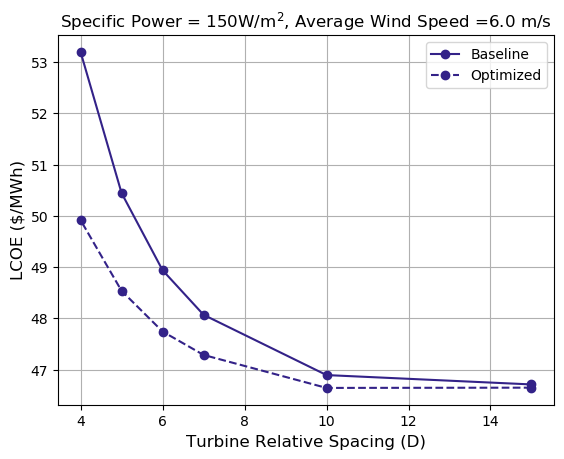

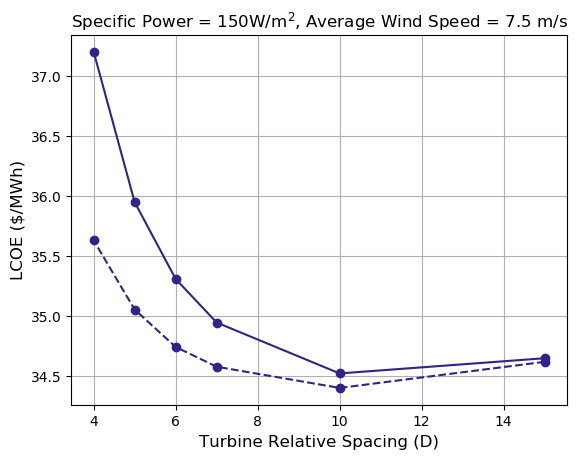

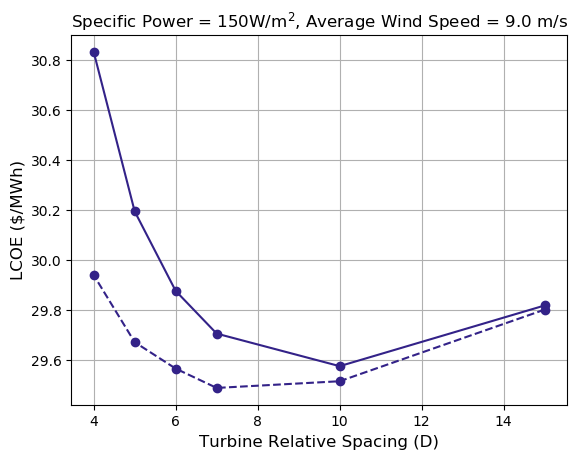

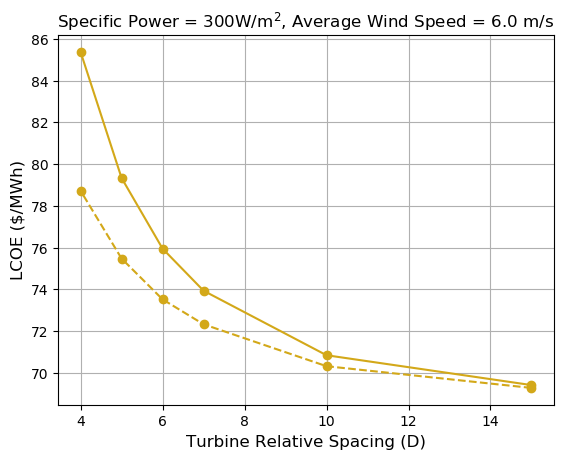

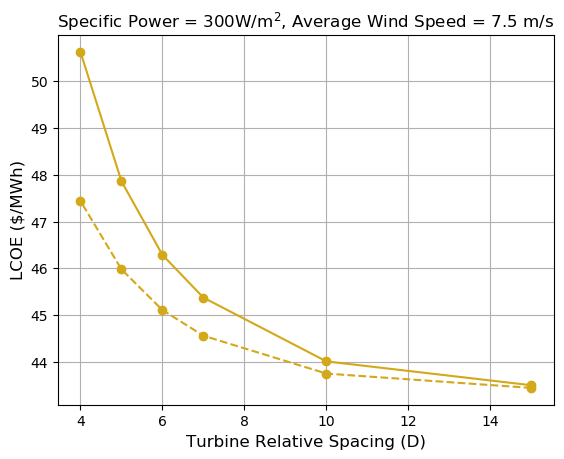

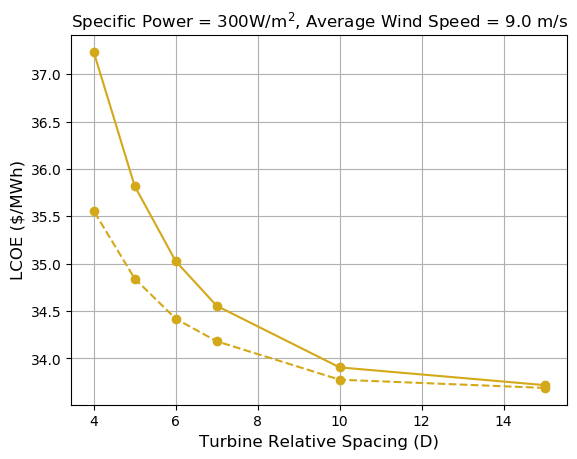

In [228]:
c1 = parametric_study[(parametric_study['Avg_ws'] == 6.0) & \
                  (parametric_study['Specific_Power'] == 150)]
c2 = parametric_study[(parametric_study['Avg_ws'] == 7.5) & \
                  (parametric_study['Specific_Power'] == 150)]
c3 = parametric_study[(parametric_study['Avg_ws'] == 9.0) & \
                  (parametric_study['Specific_Power'] == 150)]


c4 = parametric_study[(parametric_study['Avg_ws'] == 6.0) & \
                  (parametric_study['Specific_Power'] == 200)]
c5 = parametric_study[(parametric_study['Avg_ws'] == 7.5) & \
                  (parametric_study['Specific_Power'] == 200)]
c6 = parametric_study[(parametric_study['Avg_ws'] == 9.0) & \
                  (parametric_study['Specific_Power'] == 200)]

c7 = parametric_study[(parametric_study['Avg_ws'] == 6.0) & \
                  (parametric_study['Specific_Power'] == 250)]
c8 = parametric_study[(parametric_study['Avg_ws'] == 7.5) & \
                  (parametric_study['Specific_Power'] == 250)]
c9 = parametric_study[(parametric_study['Avg_ws'] == 9.0) & \
                  (parametric_study['Specific_Power'] == 250)]

c10 = parametric_study[(parametric_study['Avg_ws'] == 6.0) & \
                  (parametric_study['Specific_Power'] == 300)]
c11 = parametric_study[(parametric_study['Avg_ws'] == 7.5) & \
                  (parametric_study['Specific_Power'] == 300)]
c12 = parametric_study[(parametric_study['Avg_ws'] == 9.0) & \
                  (parametric_study['Specific_Power'] == 300)]

norm_case_6 = c1[c1['Turb_spc_rel'] == 15]['Baseline wake LCOE  ($/MWh)'].iloc[0]
plt.plot(c1['Turb_spc_rel'], c1['Baseline wake LCOE  ($/MWh)'], 'o-',color='C0',label ='Baseline')
plt.plot(c1['Turb_spc_rel'], c1['LCOE Wake Steering ($/MWh)'], 'o--',color='C0',label ='Optimized')
plt.xlabel('Turbine Relative Spacing (D)', fontsize=12)
plt.ylabel('LCOE ($/MWh)', fontsize=12)
plt.grid()
plt.legend()
plt.title('Specific Power = 150W/m$^2$, Average Wind Speed =6.0 m/s', fontsize=12)
plt.show()

norm_case_7 = c2[c2['Turb_spc_rel'] == 15]['Baseline wake LCOE  ($/MWh)'].iloc[0]
plt.plot(c2['Turb_spc_rel'], c2['Baseline wake LCOE  ($/MWh)'], 'o-',color='C0',label ='Baseline')
plt.plot(c2['Turb_spc_rel'], c2['LCOE Wake Steering ($/MWh)'], 'o--',color='C0',label ='Optimized')
plt.xlabel('Turbine Relative Spacing (D)', fontsize=12)
plt.ylabel('LCOE ($/MWh)', fontsize=12)
plt.grid()
plt.title('Specific Power = 150W/m$^2$, Average Wind Speed = 7.5 m/s', fontsize=12)

#plt.legend()
plt.show()

norm_case_9 = c3[c3['Turb_spc_rel'] == 15]['Baseline wake LCOE  ($/MWh)'].iloc[0]
plt.plot(c3['Turb_spc_rel'], c3['Baseline wake LCOE  ($/MWh)'], 'o-',color='C0',label ='150')
plt.plot(c3['Turb_spc_rel'], c3['LCOE Wake Steering ($/MWh)'], 'o--',color='C0',label ='150')
plt.xlabel('Turbine Relative Spacing (D)', fontsize=12)
plt.ylabel('LCOE ($/MWh)', fontsize=12)
plt.grid()
#plt.legend()
plt.title('Specific Power = 150W/m$^2$, Average Wind Speed = 9.0 m/s', fontsize=12)

plt.show()

norm_case_10 = c1[c1['Turb_spc_rel'] == 15]['Baseline wake LCOE  ($/MWh)'].iloc[0]
plt.plot(c10['Turb_spc_rel'], c10['Baseline wake LCOE  ($/MWh)'], 'o-',color='C3',label ='Baseline')
plt.plot(c10['Turb_spc_rel'], c10['LCOE Wake Steering ($/MWh)'], 'o--',color='C3',label ='Optimized')
plt.xlabel('Turbine Relative Spacing (D)', fontsize=12)
plt.ylabel('LCOE ($/MWh)', fontsize=12)
plt.grid()
#plt.legend()
plt.title('Specific Power = 300W/m$^2$, Average Wind Speed = 6.0 m/s', fontsize=12)

plt.show()

norm_case_7 = c2[c2['Turb_spc_rel'] == 15]['Baseline wake LCOE  ($/MWh)'].iloc[0]
plt.plot(c11['Turb_spc_rel'], c11['Baseline wake LCOE  ($/MWh)'], 'o-',color='C3',label ='Baseline')
plt.plot(c11['Turb_spc_rel'], c11['LCOE Wake Steering ($/MWh)'], 'o--',color='C3',label ='Optimized')
plt.xlabel('Turbine Relative Spacing (D)', fontsize=12)
plt.ylabel('LCOE ($/MWh)', fontsize=12)
plt.title('Specific Power = 300W/m$^2$, Average Wind Speed = 7.5 m/s', fontsize=12)

plt.grid()
#plt.legend()
plt.show()

norm_case_9 = c3[c3['Turb_spc_rel'] == 15]['Baseline wake LCOE  ($/MWh)'].iloc[0]
plt.plot(c12['Turb_spc_rel'], c12['Baseline wake LCOE  ($/MWh)'], 'o-',color='C3',label ='150')
plt.plot(c12['Turb_spc_rel'], c12['LCOE Wake Steering ($/MWh)'], 'o--',color='C3',label ='150')
plt.xlabel('Turbine Relative Spacing (D)', fontsize=12)
plt.ylabel('LCOE ($/MWh)', fontsize=12)
plt.title('Specific Power = 300W/m$^2$, Average Wind Speed = 9.0 m/s', fontsize=12)

plt.grid()
#plt.legend()
plt.show()


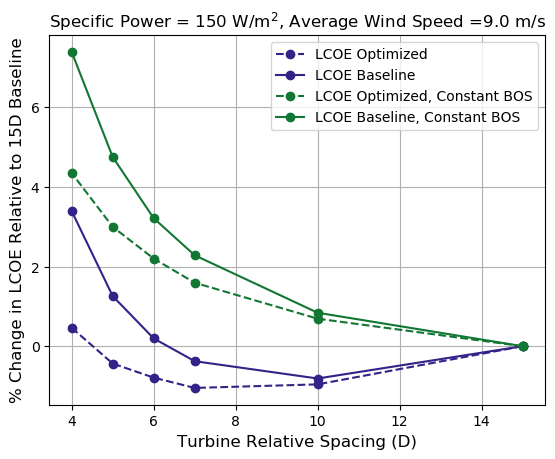

In [148]:
### Normalized Case study plot for 150 at 9 m/s
c1 = parametric_study[(parametric_study['Avg_ws'] == 9.0) & \
                  (parametric_study['Specific_Power'] == 150)]
c1
plt.plot(c1['Turb_spc_rel'], c1['Normalized  wake steering 15D']*100, 'o--',color='C0',label ='LCOE Optimized')
plt.plot(c1['Turb_spc_rel'], c1['Normalized  LCOE  baseline wake relative to 15D ']*100, 'o-',color='C0',label ='LCOE Baseline')

plt.plot(c1['Turb_spc_rel'], c1['Normalized Constant BOS Wake Steering (% change LCOE)']*100, 'o--',color='C1',label ='LCOE Optimized, Constant BOS')
plt.plot(c1['Turb_spc_rel'], c1['Normalized LCOE constant BOS  base wake ']*100, 'o-',color='C1',label ='LCOE Baseline, Constant BOS')

plt.xlabel('Turbine Relative Spacing (D)', fontsize=12)
plt.ylabel('% Change in LCOE Relative to 15D Baseline', fontsize=12)
plt.title('Specific Power = 150 W/m$^2$, Average Wind Speed =9.0 m/s', fontsize=12)
plt.grid()
plt.legend()
plt.show()

### Question 2: Relative Effects of parameters on the baseline wake losses

c:\users\dbensaso\appdata\local\continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


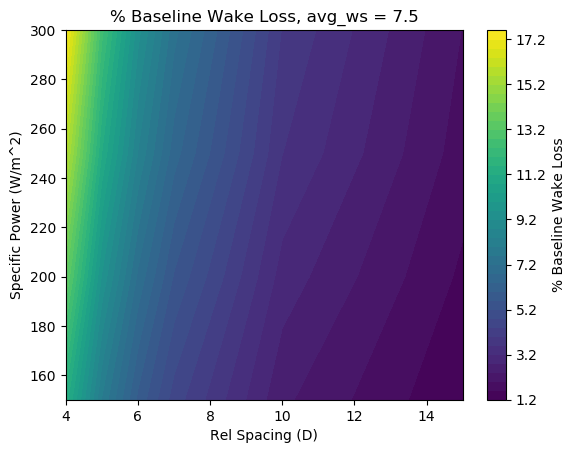

c:\users\dbensaso\appdata\local\continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


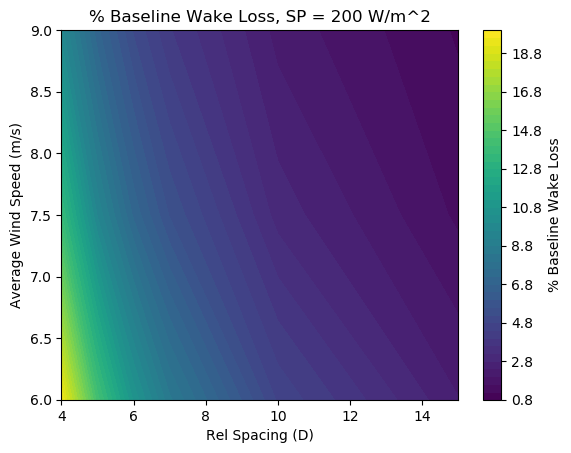

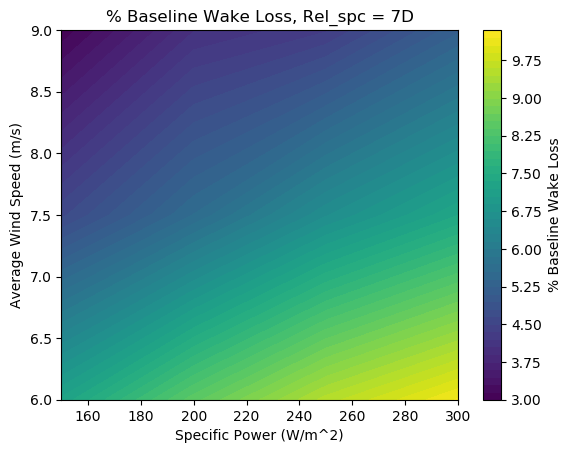

In [150]:
### Look at effect of spc and avg ws, spc and SP, Sp and avg ws. 
case1 = parametric_study[(parametric_study['Avg_ws'] == 7.5)]
case1.sort_values(by ='Turb_spc_rel', inplace= True)
Z = case1.pivot_table(index='Turb_spc_rel', columns='Specific_Power', values='Wk_Loss_Baseline').T.values
X_unique = np.sort(case1.Turb_spc_rel.unique())
Y_unique = np.sort(case1.Specific_Power.unique())
X, Y = np.meshgrid(X_unique, Y_unique)
fig,ax=plt.subplots(1,1)
cp = ax.contourf(X, Y, Z, 50)
v = fig.colorbar(cp) # Add a colorbar to a plot
v.set_label('% Baseline Wake Loss')
ax.set_title('% Baseline Wake Loss, avg_ws = 7.5')
ax.set_xlabel('Rel Spacing (D)')
ax.set_ylabel('Specific Power (W/m^2)')
plt.show()

case2 = parametric_study[(parametric_study['Specific_Power'] == 200)]
case2.sort_values(by ='Turb_spc_rel', inplace= True)
Z = case2.pivot_table(index='Turb_spc_rel', columns='Avg_ws', values='Wk_Loss_Baseline').T.values
X_unique = np.sort(case2.Turb_spc_rel.unique())
Y_unique = np.sort(case2.Avg_ws.unique())
X, Y = np.meshgrid(X_unique, Y_unique)
fig,ax=plt.subplots(1,1)
cp = ax.contourf(X, Y, Z, 50)
v = fig.colorbar(cp) # Add a colorbar to a plot
v.set_label('% Baseline Wake Loss')
ax.set_title('% Baseline Wake Loss, SP = 200 W/m^2')
ax.set_xlabel('Rel Spacing (D)')
ax.set_ylabel('Average Wind Speed (m/s)')
plt.show()

case3 = parametric_study[(parametric_study['Turb_spc_rel'] == 7)]
#case3.sort_values(by ='Turb_spc_rel', inplace= True)
Z = case3.pivot_table(index='Specific_Power', columns='Avg_ws', values='Wk_Loss_Baseline').T.values
X_unique = np.sort(case3.Specific_Power.unique())
Y_unique = np.sort(case3.Avg_ws.unique())
X, Y = np.meshgrid(X_unique, Y_unique)
fig,ax=plt.subplots(1,1)
cp = ax.contourf(X, Y, Z, 50)
v = fig.colorbar(cp) # Add a colorbar to a plot
v.set_label('% Baseline Wake Loss')
ax.set_title('% Baseline Wake Loss, Rel_spc = 7D')
ax.set_xlabel('Specific Power (W/m^2)')
ax.set_ylabel('Average Wind Speed (m/s)')
plt.show()

In [ ]:
## Basline wake loss is consitent with the AEP gain (since we already showed those two are somewhat related)
## USe jump to quanitfy the magntiude of the effects...

### Question 3: Relative Effects of parameters on the BOS

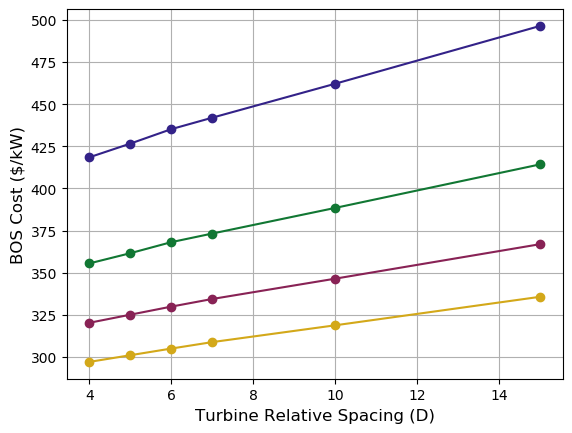

In [229]:
# Since avg_ws has no effect on this, can just look at effect of other two using single plot

c5 = parametric_study[(parametric_study['Avg_ws'] == 9.0) & \
                  (parametric_study['Specific_Power'] == 150)]
c6 = parametric_study[(parametric_study['Avg_ws'] == 9.0) & \
                  (parametric_study['Specific_Power'] == 200)]
c7 = parametric_study[(parametric_study['Avg_ws'] == 9.0) & \
                  (parametric_study['Specific_Power'] == 250)]
c8 = parametric_study[(parametric_study['Avg_ws'] == 9.0) & \
                  (parametric_study['Specific_Power'] == 300)]

plt.plot(c5['Turb_spc_rel'], c5['BOS Cost ($/kW)'], 'o-',label ='SP= 150 W/m$^2$')
plt.plot(c6['Turb_spc_rel'], c6['BOS Cost ($/kW)'], 'o-',label ='SP= 200 W/m$^2$')
plt.plot(c7['Turb_spc_rel'], c7['BOS Cost ($/kW)'], 'o-',label ='SP= 250 W/m$^2$')
plt.plot(c8['Turb_spc_rel'], c8['BOS Cost ($/kW)'], 'o-',label ='SP= 300 W/m$^2$')
plt.xlabel('Turbine Relative Spacing (D)', fontsize=12)
plt.ylabel('BOS Cost ($/kW)', fontsize=12)
plt.grid()
#plt.legend()
plt.show()

### Question 4: Relative Effects of parameters on the LCOE

c:\users\dbensaso\appdata\local\continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


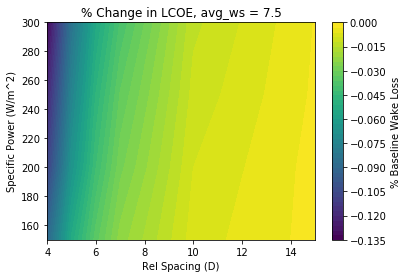

c:\users\dbensaso\appdata\local\continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


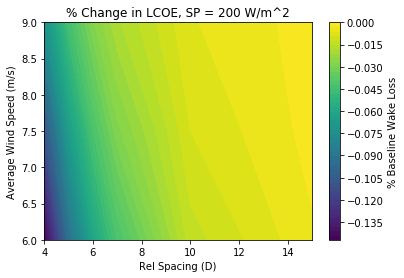

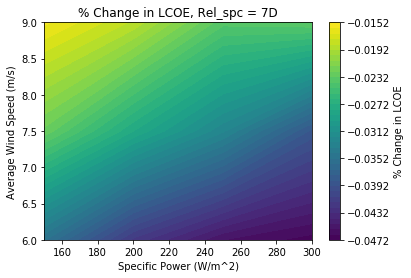

In [52]:
case1 = parametric_study[(parametric_study['Avg_ws'] == 7.5)]
case1.sort_values(by ='Turb_spc_rel', inplace= True)
Z = case1.pivot_table(index='Turb_spc_rel', columns='Specific_Power', values='2018 turbine Change LCOE with wake steering (% LCOE)').T.values
X_unique = np.sort(case1.Turb_spc_rel.unique())
Y_unique = np.sort(case1.Specific_Power.unique())
X, Y = np.meshgrid(X_unique, Y_unique)
fig,ax=plt.subplots(1,1)
cp = ax.contourf(X, Y, Z, 50)
v = fig.colorbar(cp) # Add a colorbar to a plot
v.set_label('% Baseline Wake Loss')
ax.set_title('% Change in LCOE, avg_ws = 7.5')
ax.set_xlabel('Rel Spacing (D)')
ax.set_ylabel('Specific Power (W/m^2)')
plt.show()

case2 = parametric_study[(parametric_study['Specific_Power'] == 200)]
case2.sort_values(by ='Turb_spc_rel', inplace= True)
Z = case2.pivot_table(index='Turb_spc_rel', columns='Avg_ws', values='2018 turbine Change LCOE with wake steering (% LCOE)').T.values
X_unique = np.sort(case2.Turb_spc_rel.unique())
Y_unique = np.sort(case2.Avg_ws.unique())
X, Y = np.meshgrid(X_unique, Y_unique)
fig,ax=plt.subplots(1,1)
cp = ax.contourf(X, Y, Z, 50)
v = fig.colorbar(cp) # Add a colorbar to a plot
v.set_label('% Baseline Wake Loss')
ax.set_title('% Change in LCOE, SP = 200 W/m^2')
ax.set_xlabel('Rel Spacing (D)')
ax.set_ylabel('Average Wind Speed (m/s)')
plt.show()

case3 = parametric_study[(parametric_study['Turb_spc_rel'] == 7)]
#case3.sort_values(by ='Turb_spc_rel', inplace= True)
Z = case3.pivot_table(index='Specific_Power', columns='Avg_ws', values='2018 turbine Change LCOE with wake steering (% LCOE)').T.values
X_unique = np.sort(case3.Specific_Power.unique())
Y_unique = np.sort(case3.Avg_ws.unique())
X, Y = np.meshgrid(X_unique, Y_unique)
fig,ax=plt.subplots(1,1)
cp = ax.contourf(X, Y, Z, 50)
v = fig.colorbar(cp) # Add a colorbar to a plot
v.set_label('% Change in LCOE')
ax.set_title('% Change in LCOE, Rel_spc = 7D')
ax.set_xlabel('Specific Power (W/m^2)')
ax.set_ylabel('Average Wind Speed (m/s)')
plt.show()

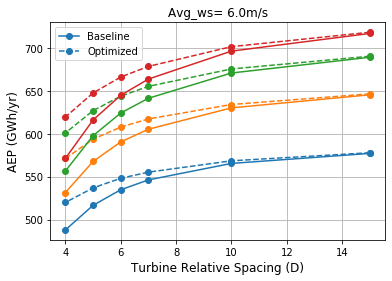

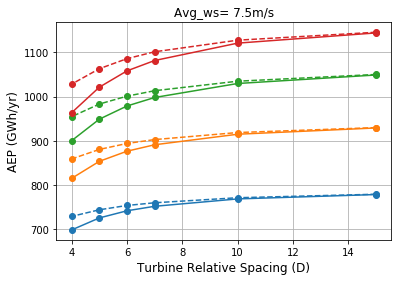

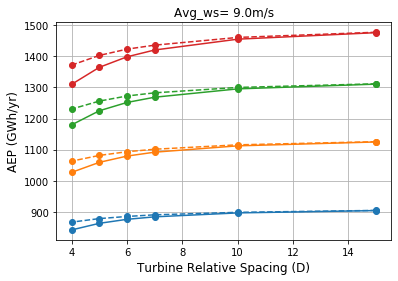

In [59]:
c1 = parametric_study[(parametric_study['Avg_ws'] == 6.0) & \
                  (parametric_study['Specific_Power'] == 150)]
c2 = parametric_study[(parametric_study['Avg_ws'] == 6.0) & \
                  (parametric_study['Specific_Power'] == 200)]
c3 = parametric_study[(parametric_study['Avg_ws'] == 6.0) & \
                  (parametric_study['Specific_Power'] == 250)]
c4 = parametric_study[(parametric_study['Avg_ws'] == 6.0) & \
                  (parametric_study['Specific_Power'] == 300)]


c5 = parametric_study[(parametric_study['Avg_ws'] == 7.5) & \
                  (parametric_study['Specific_Power'] == 150)]
c6 = parametric_study[(parametric_study['Avg_ws'] == 7.5) & \
                  (parametric_study['Specific_Power'] == 200)]
c7 = parametric_study[(parametric_study['Avg_ws'] == 7.5) & \
                  (parametric_study['Specific_Power'] == 250)]
c8 = parametric_study[(parametric_study['Avg_ws'] == 7.5) & \
                  (parametric_study['Specific_Power'] == 300)]

c9 = parametric_study[(parametric_study['Avg_ws'] == 9.0) & \
                  (parametric_study['Specific_Power'] == 150)]
c10 = parametric_study[(parametric_study['Avg_ws'] == 9.0) & \
                  (parametric_study['Specific_Power'] == 200)]
c11 = parametric_study[(parametric_study['Avg_ws'] == 9.0) & \
                  (parametric_study['Specific_Power'] == 250)]
c12 = parametric_study[(parametric_study['Avg_ws'] == 9.0) & \
                  (parametric_study['Specific_Power'] == 300)]

plt.plot(c1['Turb_spc_rel'], c1['AEP_Baseline gwh/yr'], 'o-',color='C0',label ='Baseline')
plt.plot(c1['Turb_spc_rel'], c1['AEP_Opt GWh/yr'], 'o--',color='C0',label ='Optimized')

plt.plot(c2['Turb_spc_rel'], c2['AEP_Baseline gwh/yr'], 'o-',color='C1')
plt.plot(c2['Turb_spc_rel'], c2['AEP_Opt GWh/yr'], 'o--',color='C1')

plt.plot(c3['Turb_spc_rel'], c3['AEP_Baseline gwh/yr'], 'o-',color='C2')
plt.plot(c3['Turb_spc_rel'], c3['AEP_Opt GWh/yr'], 'o--',color='C2')

plt.plot(c4['Turb_spc_rel'], c4['AEP_Baseline gwh/yr'], 'o-',color='C3')
plt.plot(c4['Turb_spc_rel'], c4['AEP_Opt GWh/yr'], 'o--',color='C3')

plt.xlabel('Turbine Relative Spacing (D)', fontsize=12)
plt.ylabel('AEP (GWh/yr)', fontsize=12)
plt.grid()
plt.title('Avg_ws= 6.0m/s',fontsize=12)
plt.legend()
plt.show()

plt.plot(c5['Turb_spc_rel'], c5['AEP_Baseline gwh/yr'], 'o-',color='C0',label ='Baseline')
plt.plot(c5['Turb_spc_rel'], c5['AEP_Opt GWh/yr'], 'o--',color='C0',label ='Optimized')

plt.plot(c6['Turb_spc_rel'], c6['AEP_Baseline gwh/yr'], 'o-',color='C1')
plt.plot(c6['Turb_spc_rel'], c6['AEP_Opt GWh/yr'], 'o--',color='C1')

plt.plot(c7['Turb_spc_rel'], c7['AEP_Baseline gwh/yr'], 'o-',color='C2')
plt.plot(c7['Turb_spc_rel'], c7['AEP_Opt GWh/yr'], 'o--',color='C2')

plt.plot(c8['Turb_spc_rel'], c8['AEP_Baseline gwh/yr'], 'o-',color='C3')
plt.plot(c8['Turb_spc_rel'], c8['AEP_Opt GWh/yr'], 'o--',color='C3')

plt.xlabel('Turbine Relative Spacing (D)', fontsize=12)
plt.ylabel('AEP (GWh/yr)', fontsize=12)
plt.grid()
plt.title('Avg_ws= 7.5m/s',fontsize=12)
#plt.legend()
plt.show()

plt.plot(c9['Turb_spc_rel'], c9['AEP_Baseline gwh/yr'], 'o-',color='C0',label ='Baseline')
plt.plot(c9['Turb_spc_rel'], c9['AEP_Opt GWh/yr'], 'o--',color='C0',label ='Optimized')

plt.plot(c10['Turb_spc_rel'], c10['AEP_Baseline gwh/yr'], 'o-',color='C1')
plt.plot(c10['Turb_spc_rel'], c10['AEP_Opt GWh/yr'], 'o--',color='C1')

plt.plot(c11['Turb_spc_rel'], c11['AEP_Baseline gwh/yr'], 'o-',color='C2')
plt.plot(c11['Turb_spc_rel'], c11['AEP_Opt GWh/yr'], 'o--',color='C2')

plt.plot(c12['Turb_spc_rel'], c12['AEP_Baseline gwh/yr'], 'o-',color='C3')
plt.plot(c12['Turb_spc_rel'], c12['AEP_Opt GWh/yr'], 'o--',color='C3')

plt.xlabel('Turbine Relative Spacing (D)', fontsize=12)
plt.ylabel('AEP (GWh/yr)', fontsize=12)
plt.grid()
plt.title('Avg_ws= 9.0m/s',fontsize=12)
#plt.legend()
plt.show()



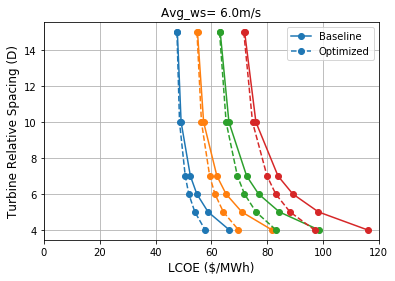

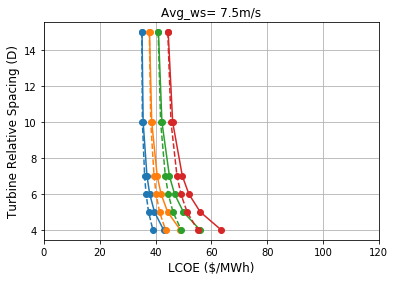

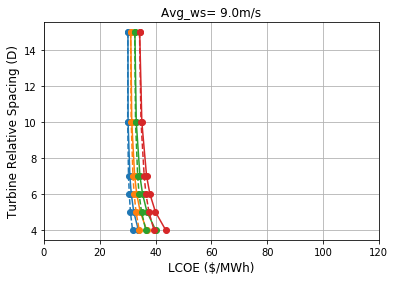

In [111]:
c1 = parametric_study[(parametric_study['Avg_ws'] == 6.0) & \
                  (parametric_study['Specific_Power'] == 150)]
c2 = parametric_study[(parametric_study['Avg_ws'] == 6.0) & \
                  (parametric_study['Specific_Power'] == 200)]
c3 = parametric_study[(parametric_study['Avg_ws'] == 6.0) & \
                  (parametric_study['Specific_Power'] == 250)]
c4 = parametric_study[(parametric_study['Avg_ws'] == 6.0) & \
                  (parametric_study['Specific_Power'] == 300)]


c5 = parametric_study[(parametric_study['Avg_ws'] == 7.5) & \
                  (parametric_study['Specific_Power'] == 150)]
c6 = parametric_study[(parametric_study['Avg_ws'] == 7.5) & \
                  (parametric_study['Specific_Power'] == 200)]
c7 = parametric_study[(parametric_study['Avg_ws'] == 7.5) & \
                  (parametric_study['Specific_Power'] == 250)]
c8 = parametric_study[(parametric_study['Avg_ws'] == 7.5) & \
                  (parametric_study['Specific_Power'] == 300)]

c9 = parametric_study[(parametric_study['Avg_ws'] == 9.0) & \
                  (parametric_study['Specific_Power'] == 150)]
c10 = parametric_study[(parametric_study['Avg_ws'] == 9.0) & \
                  (parametric_study['Specific_Power'] == 200)]
c11 = parametric_study[(parametric_study['Avg_ws'] == 9.0) & \
                  (parametric_study['Specific_Power'] == 250)]
c12 = parametric_study[(parametric_study['Avg_ws'] == 9.0) & \
                  (parametric_study['Specific_Power'] == 300)]

plt.plot(c1['2018 Turbine Baseline Cost LCOE baseline ($/MWh)'], c1['Turb_spc_rel'], 'o-',color='C0',label ='Baseline')
plt.plot(c1['2018 turbine LCOE Wake Steering ($/MWh)'], c1['Turb_spc_rel'], 'o--',color='C0',label ='Optimized')

plt.plot(c2['2018 Turbine Baseline Cost LCOE baseline ($/MWh)'], c2['Turb_spc_rel'], 'o-',color='C1')
plt.plot(c2['2018 turbine LCOE Wake Steering ($/MWh)'], c2['Turb_spc_rel'], 'o--',color='C1')

plt.plot(c3['2018 Turbine Baseline Cost LCOE baseline ($/MWh)'], c3['Turb_spc_rel'], 'o-',color='C2')
plt.plot(c3['2018 turbine LCOE Wake Steering ($/MWh)'], c3['Turb_spc_rel'], 'o--',color='C2')

plt.plot(c4['2018 Turbine Baseline Cost LCOE baseline ($/MWh)'], c4['Turb_spc_rel'], 'o-',color='C3')
plt.plot(c4['2018 turbine LCOE Wake Steering ($/MWh)'], c4['Turb_spc_rel'], 'o--',color='C3')

plt.xlabel('LCOE ($/MWh)', fontsize=12)
plt.ylabel('Turbine Relative Spacing (D)', fontsize=12)
plt.grid()
plt.title('Avg_ws= 6.0m/s',fontsize=12)
plt.legend()
plt.xlim((0,120))

plt.show()

plt.plot(c5['2018 Turbine Baseline Cost LCOE baseline ($/MWh)'], c5['Turb_spc_rel'], 'o-',color='C0',label ='SP= 150 W/m$^2$')
plt.plot(c5['2018 turbine LCOE Wake Steering ($/MWh)'], c5['Turb_spc_rel'], 'o--',color='C0')

plt.plot(c6['2018 Turbine Baseline Cost LCOE baseline ($/MWh)'], c6['Turb_spc_rel'], 'o-',color='C1',label ='SP= 200 W/m$^2$ Base')
plt.plot(c6['2018 turbine LCOE Wake Steering ($/MWh)'], c6['Turb_spc_rel'], 'o--',color='C1')

plt.plot(c7['2018 Turbine Baseline Cost LCOE baseline ($/MWh)'], c7['Turb_spc_rel'], 'o-',color='C2',label ='SP= 250 W/m$^2$ Base')
plt.plot(c7['2018 turbine LCOE Wake Steering ($/MWh)'], c7['Turb_spc_rel'], 'o--',color='C2')

plt.plot(c8['2018 Turbine Baseline Cost LCOE baseline ($/MWh)'], c8['Turb_spc_rel'], 'o-',color='C3',label ='SP= 300 W/m$^2$ Base')
plt.plot(c8['2018 turbine LCOE Wake Steering ($/MWh)'], c8['Turb_spc_rel'], 'o--',color='C3')

plt.xlabel('LCOE ($/MWh)', fontsize=12)
plt.ylabel('Turbine Relative Spacing (D)', fontsize=12)
plt.grid()
plt.title('Avg_ws= 7.5m/s',fontsize=12)
#plt.legend()
plt.xlim((0,120))

plt.show()

plt.plot(c9['2018 Turbine Baseline Cost LCOE baseline ($/MWh)'], c9['Turb_spc_rel'], 'o-',color='C0',label ='SP= 150 W/m$^2$')
plt.plot(c9['2018 turbine LCOE Wake Steering ($/MWh)'], c9['Turb_spc_rel'], 'o--',color='C0')

plt.plot(c10['2018 Turbine Baseline Cost LCOE baseline ($/MWh)'], c10['Turb_spc_rel'], 'o-',color='C1',label ='SP= 200 W/m$^2$ Base')
plt.plot(c10['2018 turbine LCOE Wake Steering ($/MWh)'], c10['Turb_spc_rel'], 'o--',color='C1')

plt.plot(c11['2018 Turbine Baseline Cost LCOE baseline ($/MWh)'], c11['Turb_spc_rel'], 'o-',color='C2',label ='SP= 250 W/m$^2$ Base')
plt.plot(c11['2018 turbine LCOE Wake Steering ($/MWh)'], c11['Turb_spc_rel'], 'o--',color='C2')

plt.plot(c12['2018 Turbine Baseline Cost LCOE baseline ($/MWh)'], c12['Turb_spc_rel'], 'o-',color='C3',label ='SP= 300 W/m$^2$ Base')
plt.plot(c12['2018 turbine LCOE Wake Steering ($/MWh)'], c12['Turb_spc_rel'], 'o--',color='C3')

plt.xlabel('LCOE ($/MWh)', fontsize=12)
plt.ylabel('Turbine Relative Spacing (D)', fontsize=12)
plt.grid()
plt.xlim((0,120))

plt.title('Avg_ws= 9.0m/s',fontsize=12)
#plt.legend()
plt.show()



No handles with labels found to put in legend.


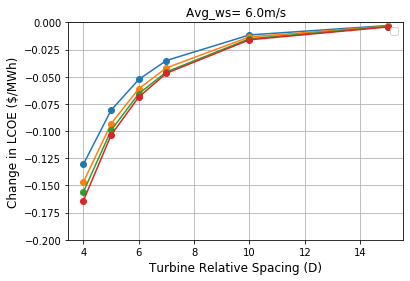

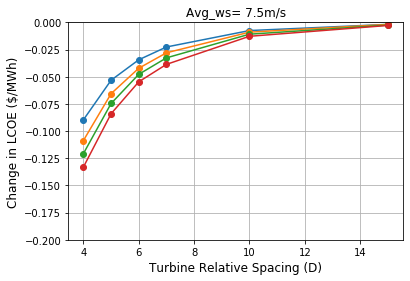

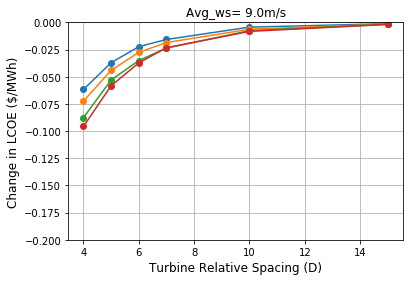

In [110]:
c1 = parametric_study[(parametric_study['Avg_ws'] == 6.0) & \
                  (parametric_study['Specific_Power'] == 150)]
c2 = parametric_study[(parametric_study['Avg_ws'] == 6.0) & \
                  (parametric_study['Specific_Power'] == 200)]
c3 = parametric_study[(parametric_study['Avg_ws'] == 6.0) & \
                  (parametric_study['Specific_Power'] == 250)]
c4 = parametric_study[(parametric_study['Avg_ws'] == 6.0) & \
                  (parametric_study['Specific_Power'] == 300)]


c5 = parametric_study[(parametric_study['Avg_ws'] == 7.5) & \
                  (parametric_study['Specific_Power'] == 150)]
c6 = parametric_study[(parametric_study['Avg_ws'] == 7.5) & \
                  (parametric_study['Specific_Power'] == 200)]
c7 = parametric_study[(parametric_study['Avg_ws'] == 7.5) & \
                  (parametric_study['Specific_Power'] == 250)]
c8 = parametric_study[(parametric_study['Avg_ws'] == 7.5) & \
                  (parametric_study['Specific_Power'] == 300)]

c9 = parametric_study[(parametric_study['Avg_ws'] == 9.0) & \
                  (parametric_study['Specific_Power'] == 150)]
c10 = parametric_study[(parametric_study['Avg_ws'] == 9.0) & \
                  (parametric_study['Specific_Power'] == 200)]
c11 = parametric_study[(parametric_study['Avg_ws'] == 9.0) & \
                  (parametric_study['Specific_Power'] == 250)]
c12 = parametric_study[(parametric_study['Avg_ws'] == 9.0) & \
                  (parametric_study['Specific_Power'] == 300)]

plt.plot(c1['Turb_spc_rel'], c1['2018 turbine Change LCOE with wake steering (% LCOE)'], 'o-',color='C0')


plt.plot(c2['Turb_spc_rel'], c2['2018 turbine Change LCOE with wake steering (% LCOE)'], 'o-',color='C1')

plt.plot(c3['Turb_spc_rel'], c3['2018 turbine Change LCOE with wake steering (% LCOE)'], 'o-',color='C2')


plt.plot(c4['Turb_spc_rel'], c4['2018 turbine Change LCOE with wake steering (% LCOE)'], 'o-',color='C3')


plt.xlabel('Turbine Relative Spacing (D)', fontsize=12)
plt.ylabel('Change in LCOE ($/MWh)', fontsize=12)
plt.grid()
plt.title('Avg_ws= 6.0m/s',fontsize=12)
plt.legend()
plt.ylim((-0.2,0))
plt.show()

plt.plot(c5['Turb_spc_rel'], c5['2018 turbine Change LCOE with wake steering (% LCOE)'], 'o-',color='C0',label ='SP= 150 W/m$^2$')


plt.plot(c6['Turb_spc_rel'], c6['2018 turbine Change LCOE with wake steering (% LCOE)'], 'o-',color='C1',label ='SP= 200 W/m$^2$ Base')


plt.plot(c7['Turb_spc_rel'], c7['2018 turbine Change LCOE with wake steering (% LCOE)'], 'o-',color='C2',label ='SP= 250 W/m$^2$ Base')


plt.plot(c8['Turb_spc_rel'], c8['2018 turbine Change LCOE with wake steering (% LCOE)'], 'o-',color='C3',label ='SP= 300 W/m$^2$ Base')


plt.xlabel('Turbine Relative Spacing (D)', fontsize=12)
plt.ylabel('Change in LCOE ($/MWh)', fontsize=12)
plt.grid()
plt.title('Avg_ws= 7.5m/s',fontsize=12)
#plt.legend()
plt.ylim((-0.2,0))
plt.show()

plt.plot(c9['Turb_spc_rel'], c9['2018 turbine Change LCOE with wake steering (% LCOE)'], 'o-',color='C0',label ='SP= 150 W/m$^2$')

plt.plot(c10['Turb_spc_rel'], c10['2018 turbine Change LCOE with wake steering (% LCOE)'], 'o-',color='C1',label ='SP= 200 W/m$^2$ Base')

plt.plot(c11['Turb_spc_rel'], c11['2018 turbine Change LCOE with wake steering (% LCOE)'], 'o-',color='C2',label ='SP= 250 W/m$^2$ Base')

plt.plot(c12['Turb_spc_rel'], c12['2018 turbine Change LCOE with wake steering (% LCOE)'], 'o-',color='C3',label ='SP= 300 W/m$^2$ Base')

plt.xlabel('Turbine Relative Spacing (D)', fontsize=12)
plt.ylabel('Change in LCOE ($/MWh)', fontsize=12)
plt.grid()
plt.title('Avg_ws= 9.0m/s',fontsize=12)
#plt.legend()
plt.ylim((-0.2,0))

plt.show()



# Wd var section

In [162]:
## Have wake steering perfromance at three different spacings using wd variability 
file_path_5 = r'C:\Users\dbensaso\floris\examples\optimization\scipy\Saved_Fig\Parametric_Study' 
folder_name_5= 'tabular_data_pickle_unc' # a folder by this name should be created prior in path above 
final_path_5= os.path.join(file_path_5, folder_name_5)

# Combien all pickle files in the path 
dx5= glob.glob('{}\*'.format(final_path_5))
dx5 = [f for f in dx5 if 'Pickle' in f]
unc_data=pd.DataFrame([])
for i in dx5: 
    dw5= pd.read_pickle(i)
    unc_data = unc_data.append(dw5, ignore_index=True)
    unc_data.sort_values(by ='Turb_spc_D', inplace= True)

    ## Have wake steering perfromance at three different spacings using wd variability 
folder_name_6= 'tabular_data_pickle' # a folder by this name should be created prior in path above 
final_path_6= os.path.join(file_path_5, folder_name_6)

# Combien all pickle files in the path 
dx6= glob.glob('{}\*'.format(final_path_6))
dx6 = [f for f in dx6 if 'avg_ws=7.5_SP=200' in f]
norm_data=pd.DataFrame([])
for i in dx6: 
    dw6= pd.read_pickle(i)
    norm_data = norm_data.append(dw6, ignore_index=True)
    norm_data.sort_values(by ='Turb_spc_rel', inplace= True)

c:\users\dbensaso\appdata\local\continuum\anaconda3\lib\site-packages\pandas\core\frame.py:6692: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort)
c:\users\dbensaso\appdata\local\continuum\anaconda3\lib\site-packages\pandas\core\frame.py:6692: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort)
c:\users\dbensaso\appdata\local\continuum\anaconda3\lib\site-packages\pandas\core\frame.py:6692: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior

In [163]:
del unc_data['Turb_spc_D']
unc_data['Turb_spc_D'] = [4.0, 7.0, 10.0, 15.0, 5.0, 6.0]
unc_data.sort_values(by ='Turb_spc_D', inplace= True)
unc_data


,#Turbine,%_Baseline,%_Opt,AEP_Baseline,AEP_Gain_Opt,AEP_No_Wake,AEP_Opt,Avg_ws,Farm Name,Farm_lat,Farm_lon,Loss_Red_Opt,Rated_Power,Specific_Power,Turb_spc_rel,Turbine_D,Wk_Loss_Baseline,Wk_Loss_Opt,Turb_spc_D
0,49,86.146091,89.076119,812.527909,3.401231,943.197653,840.163863,NaN,Rel_spc=4_D=160_avg_ws=7.5_SP=200,40.995293,-84.565796,21.149467,NaN,NaN,NaN,160,13.853909,10.923881,4.0
3,49,89.553081,91.332167,840.189759,1.986627,938.203073,856.881197,7.5,Rel_spc=5_D=160_avg_ws=7.5_SP=200,NaN,NaN,17.029765,NaN,200.0,5.0,160,10.446919,8.667833,5.0
4,49,92.204107,93.222434,865.061766,1.104427,938.203073,874.615740,7.5,Rel_spc=6_D=160_avg_ws=7.5_SP=200,NaN,NaN,13.062351,NaN,200.0,6.0,160,7.795893,6.777566,6.0
5,49,94.268118,94.842635,889.134680,0.609450,943.197653,894.553509,NaN,Rel_spc=7_D=160_avg_ws=7.5_SP=200,40.995293,-84.565796,10.023179,NaN,NaN,NaN,160,5.731882,5.157365,7.0
1,49,96.870554,96.976370,913.680789,0.109234,943.197653,914.678842,NaN,Rel_spc=10_D=160_avg_ws=7.5_SP=200,40.995293,-84.565796,3.381297,NaN,NaN,NaN,160,3.129446,3.023630,10.0
2,49,98.455683,98.467311,928.631690,0.011810,943.197653,928.741366,7.5,Rel_spc=15_D=160_avg_ws=7.5_SP=200,NaN,NaN,0.752959,4021.238597,200.0,15.0,160,1.544317,1.532689,15.0


In [164]:
norm_data

,Farm Name,Rated_Power,Specific_Power,#Turbine,Turbine_D,Turb_spc_rel,Avg_ws,AEP_No_Wake,AEP_Baseline,AEP_Opt,%_Baseline,%_Opt,Wk_Loss_Baseline,Wk_Loss_Opt,AEP_Gain_Opt,Loss_Red_Opt
0,Rel_spc=4_D=160_avg_ws=7.5_SP=200,4021.238597,200,49,160,4.0,7.5,943.197653,814.621245,858.643635,86.368031,91.035387,13.631969,8.964613,5.404032,34.238310
1,Rel_spc=5_D=160_avg_ws=7.5_SP=200,4021.238597,200,49,160,5.0,7.5,943.197653,853.188264,880.177423,90.456996,93.318449,9.543004,6.681551,3.163330,29.984827
2,Rel_spc=6_D=160_avg_ws=7.5_SP=200,4021.238597,200,49,160,6.0,7.5,943.197653,876.170573,893.720390,92.893634,94.754306,7.106366,5.245694,2.003014,26.183174
5,Rel_spc=7_D=160_avg_ws=7.5_SP=200,4021.238597,200,49,160,7.0,7.5,943.197653,890.782248,902.512821,94.442797,95.686500,5.557203,4.313500,1.316884,22.380009
3,Rel_spc=10_D=160_avg_ws=7.5_SP=200,4021.238597,200,49,160,10.0,7.5,943.197653,914.645540,918.475284,96.972839,97.378877,3.027161,2.621123,0.418713,13.413171
4,Rel_spc=15_D=160_avg_ws=7.5_SP=200,4021.238597,200,49,160,15.0,7.5,943.197653,928.882595,929.702127,98.482284,98.569173,1.517716,1.430827,0.088228,5.724961


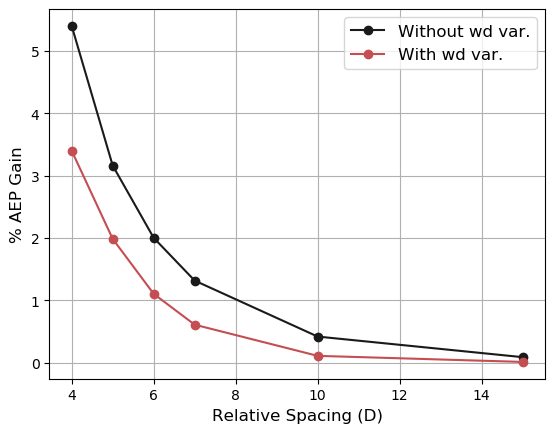

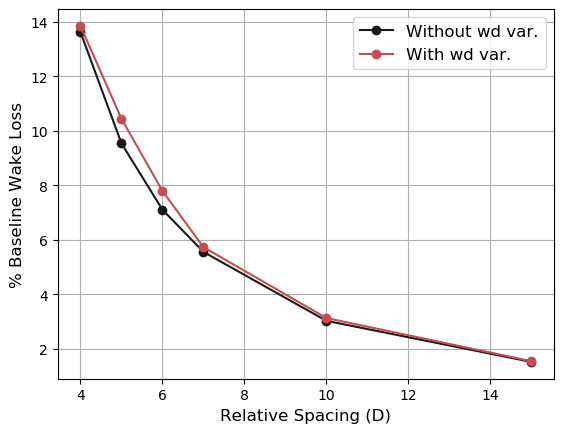

In [165]:
plt.plot(norm_data['Turb_spc_rel'],norm_data['AEP_Gain_Opt'],'ko-' ,label = 'Without wd var.')
plt.plot(unc_data['Turb_spc_D'],unc_data['AEP_Gain_Opt'],'ro-' ,label = 'With wd var.')

plt.xlabel('Relative Spacing (D)', fontsize=12)
plt.ylabel('% AEP Gain', fontsize=12)
plt.legend(fontsize=12)
plt.grid()
plt.show()

plt.plot(norm_data['Turb_spc_rel'],norm_data['Wk_Loss_Baseline'],'ko-' ,label = 'Without wd var.')
plt.plot(unc_data['Turb_spc_D'],unc_data['Wk_Loss_Baseline'],'ro-' ,label = 'With wd var.')

plt.xlabel('Relative Spacing (D)', fontsize=12)
plt.ylabel('% Baseline Wake Loss', fontsize=12)
plt.legend(fontsize=12)
plt.grid()
plt.show()
### looks like small diff in absolute baseline wake loss

In [168]:
### Look at relative change 
combined= pd.DataFrame([])
for i in [4.0, 7.0, 10.0, 15.0, 5.0, 6.0]:
    unc_case = unc_data[unc_data['Turb_spc_D'] == i]
    norm_case = norm_data[norm_data['Turb_spc_rel'] == i]
    
    diff_aep = ((unc_case['AEP_Gain_Opt'].iloc[0] - norm_case['AEP_Gain_Opt'].iloc[0]) / norm_case['AEP_Gain_Opt'].iloc[0])*100
    diff_wakeL = ((unc_case['Wk_Loss_Baseline'].iloc[0] - norm_case['Wk_Loss_Baseline'].iloc[0]) / norm_case['Wk_Loss_Baseline'].iloc[0])*100
    combined = combined.append({'spc_D': norm_case['Turb_spc_rel'].iloc[0], 'diff_Aep': diff_aep, 'diff_wakeL':diff_wakeL}, ignore_index=True)
    combined.sort_values(by ='spc_D', inplace= True)

In [169]:
combined

,diff_Aep,diff_wakeL,spc_D
0,-37.061224,1.628087,4.0
1,-37.198231,9.472018,5.0
5,-44.861747,9.702943,6.0
2,-53.720334,3.143290,7.0
3,-73.911918,3.378914,10.0
4,-86.613653,1.752735,15.0


No handles with labels found to put in legend.


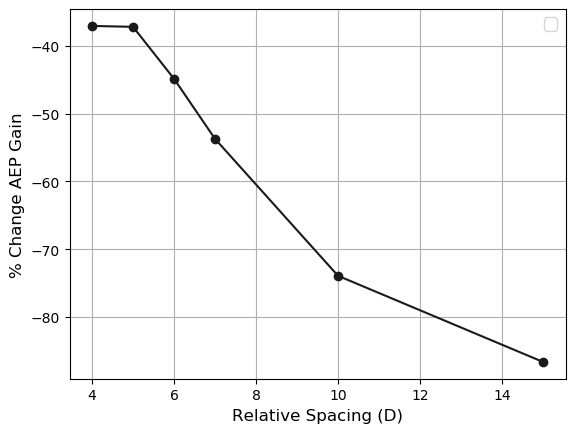

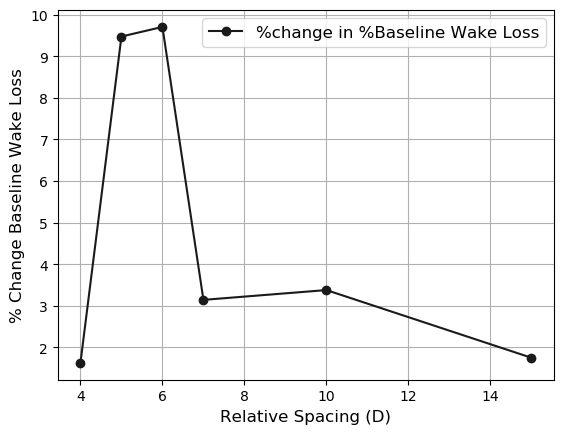

In [170]:
plt.plot(combined['spc_D'],combined['diff_Aep'],'ko-')
plt.xlabel('Relative Spacing (D)', fontsize=12)
plt.ylabel('% Change AEP Gain', fontsize=12)
plt.legend(fontsize=12)
plt.grid()
plt.show()

plt.plot(combined['spc_D'],combined['diff_wakeL'],'ko-' ,label = '%change in %Baseline Wake Loss')
plt.xlabel('Relative Spacing (D)', fontsize=12)
plt.ylabel('% Change Baseline Wake Loss', fontsize=12)
plt.legend(fontsize=12)
plt.grid()
plt.show()

In [287]:
## largest relative effect in Baseline wake loss at high spacings, hence the high relative change in AEP. 
## This supports what was shown in Eric Paper (could summarize this in table or plot)

# TI model (Peetz z/L method) 

In [171]:
## First describe the method for chnaging the average. Show the Pie chart maybe and then the general calc. (des.avg/actual avg)
## etc. Show actyual TI values used after scaling (table?)
## Have wake steering perfromance at three different spacings using wd variability 
file_path_5 = r'C:\Users\dbensaso\floris\examples\optimization\scipy\Saved_Fig\Parametric_Study' 
folder_name_5= 'tabular_data_pickle_ti_zL' # a folder by this name should be created prior in path above 
final_path_5= os.path.join(file_path_5, folder_name_5)

# Combien all pickle files in the path 
dx5= glob.glob('{}\*'.format(final_path_5))
dx5 = [f for f in dx5 if 'Pickle' in f]
zL_data=pd.DataFrame([])
for i in dx5: 
    dw5= pd.read_pickle(i)
    zL_data = zL_data.append(dw5, ignore_index=True)
    zL_data.sort_values(by ='Turb_spc_rel', inplace= True)

    
folder_name_7= 'tabular_data_pickle_ti_ws' # a folder by this name should be created prior in path above 
final_path_7= os.path.join(file_path_5, folder_name_7)

# Combien all pickle files in the path 
dx7= glob.glob('{}\*'.format(final_path_7))
dx7 = [f for f in dx7 if 'Pickle' in f]
ws_data=pd.DataFrame([])
for i in dx7: 
    dw7= pd.read_pickle(i)
    ws_data = ws_data.append(dw7, ignore_index=True)
    ws_data.sort_values(by ='Turb_spc_rel', inplace= True)

## Have wake steering perfromance at three different spacings using wd variability 

folder_name_6= 'tabular_data_pickle' # a folder by this name should be created prior in path above 
final_path_6= os.path.join(file_path_5, folder_name_6)

# Combien all pickle files in the path 
dx6= glob.glob('{}\*'.format(final_path_6))
dx6 = [f for f in dx6 if 'avg_ws=7.5_SP=200' in f]
norm_data=pd.DataFrame([])
for i in dx6: 
    dw6= pd.read_pickle(i)
    norm_data = norm_data.append(dw6, ignore_index=True)
    norm_data.sort_values(by ='Turb_spc_rel', inplace= True)

In [172]:
ws_data

,Farm Name,Rated_Power,Specific_Power,#Turbine,Turbine_D,Turb_spc_rel,Avg_ws,AEP_No_Wake,AEP_Baseline,AEP_Opt,%_Baseline,%_Opt,Wk_Loss_Baseline,Wk_Loss_Opt,AEP_Gain_Opt,Loss_Red_Opt
0,Rel_spc=4_D=160_avg_ws=7.5_SP=200,4021.238597,200,49,160,4.0,7.5,943.197653,810.978155,858.412491,85.981783,91.010881,14.018217,8.989119,5.849028,35.875447
1,Rel_spc=5_D=160_avg_ws=7.5_SP=200,4021.238597,200,49,160,5.0,7.5,943.197653,850.268779,880.464444,90.147466,93.348880,9.852534,6.651120,3.551308,32.493308
2,Rel_spc=6_D=160_avg_ws=7.5_SP=200,4021.238597,200,49,160,6.0,7.5,943.197653,874.062593,893.742986,92.670141,94.756702,7.329859,5.243298,2.251600,28.466589
5,Rel_spc=7_D=160_avg_ws=7.5_SP=200,4021.238597,200,49,160,7.0,7.5,943.197653,889.056465,902.717681,94.259826,95.708220,5.740174,4.291780,1.536597,25.232575
3,Rel_spc=10_D=160_avg_ws=7.5_SP=200,4021.238597,200,49,160,10.0,7.5,943.197653,913.743653,918.633959,96.877219,97.395700,3.122781,2.604300,0.535194,16.603198
4,Rel_spc=15_D=160_avg_ws=7.5_SP=200,4021.238597,200,49,160,15.0,7.5,943.197653,928.363971,929.691017,98.427299,98.567995,1.572701,1.432005,0.142945,8.946165


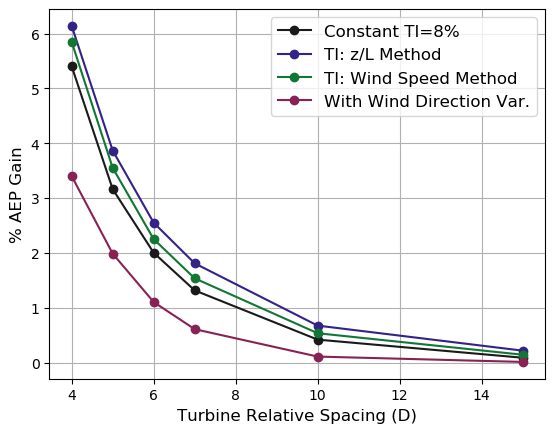

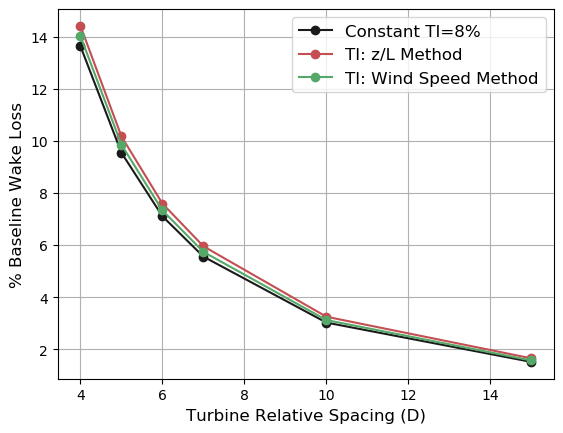

In [173]:
plt.plot(norm_data['Turb_spc_rel'],norm_data['AEP_Gain_Opt'],'ko-' ,label = 'Constant TI=8%')
plt.plot(zL_data['Turb_spc_rel'],zL_data['AEP_Gain_Opt'],'o-' ,label = 'TI: z/L Method')
plt.plot(ws_data['Turb_spc_rel'],ws_data['AEP_Gain_Opt'],'o-' ,label = 'TI: Wind Speed Method')
plt.plot(unc_data['Turb_spc_D'],unc_data['AEP_Gain_Opt'],'o-' ,label = 'With Wind Direction Var.')


plt.xlabel('Turbine Relative Spacing (D)', fontsize=12)
plt.ylabel('% AEP Gain', fontsize=12)
plt.legend(fontsize=12)
plt.grid()
plt.show()

plt.plot(norm_data['Turb_spc_rel'],norm_data['Wk_Loss_Baseline'],'ko-' ,label = 'Constant TI=8%')
plt.plot(zL_data['Turb_spc_rel'],zL_data['Wk_Loss_Baseline'],'ro-' ,label = 'TI: z/L Method')
plt.plot(ws_data['Turb_spc_rel'],ws_data['Wk_Loss_Baseline'],'go-' ,label = 'TI: Wind Speed Method')

plt.xlabel('Turbine Relative Spacing (D)', fontsize=12)
plt.ylabel('% Baseline Wake Loss', fontsize=12)
plt.legend(fontsize=12)
plt.grid()
plt.show()
## Systematically higher

In [174]:
### Look at relative change 
combined_2= pd.DataFrame([])
for i in range(len(norm_data)):
    diff_aep_zL = ((zL_data['AEP_Gain_Opt'][i] - norm_data['AEP_Gain_Opt'][i]) / norm_data['AEP_Gain_Opt'][i])*100
    diff_wakeL_zL = ((zL_data['Wk_Loss_Baseline'][i] - norm_data['Wk_Loss_Baseline'][i]) / norm_data['Wk_Loss_Baseline'][i])*100
    diff_aep_ws = ((ws_data['AEP_Gain_Opt'][i] - norm_data['AEP_Gain_Opt'][i]) / norm_data['AEP_Gain_Opt'][i])*100
    diff_wakeL_ws = ((ws_data['Wk_Loss_Baseline'][i] - norm_data['Wk_Loss_Baseline'][i]) / norm_data['Wk_Loss_Baseline'][i])*100
    
    combined_2 = combined_2.append({'spc_D': norm_data['Turb_spc_rel'][i], 'diff_Aep_zl': diff_aep_zL,\
                                    'diff_wakeL_zL':diff_wakeL_zL, 'diff_Aep_ws':diff_aep_ws,\
                                   'diff_wakeL_ws':diff_wakeL_ws}, ignore_index=True)
    combined_2.sort_values(by ='spc_D', inplace= True)

In [175]:
combined_2

,diff_Aep_ws,diff_Aep_zl,diff_wakeL_ws,diff_wakeL_zL,spc_D
0,8.234520,13.641132,2.833405,5.696816,4.0
1,12.264873,22.254272,3.243534,6.567510,5.0
2,12.410612,27.358528,3.144969,6.826895,6.0
5,16.684282,37.466433,3.292512,7.146055,7.0
3,27.818802,61.066580,3.158739,7.420793,10.0
4,62.017824,146.656261,3.622927,9.050775,15.0


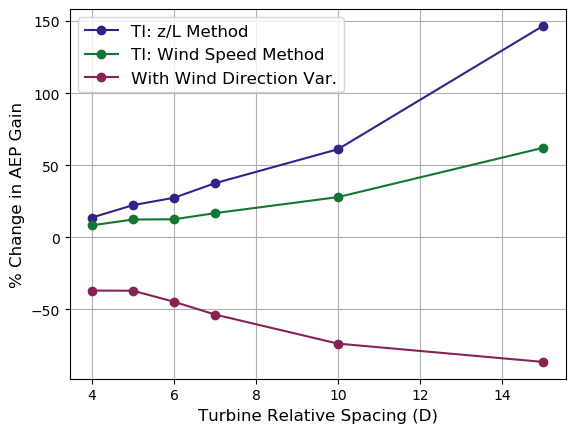

In [177]:
plt.plot(combined_2['spc_D'],combined_2['diff_Aep_zl'],'o-' ,label = 'TI: z/L Method')
plt.plot(combined_2['spc_D'],combined_2['diff_Aep_ws'],'o-' ,label = 'TI: Wind Speed Method')
plt.plot(combined['spc_D'],combined['diff_Aep'],'o-',label = 'With Wind Direction Var.')
plt.xlabel('Turbine Relative Spacing (D)', fontsize=12)
plt.ylabel('% Change in AEP Gain', fontsize=12)
plt.legend(fontsize=12)
plt.grid()
plt.show()


In [ ]:
### As expected the relative effects at shorter distances are not that high since the wake steering performacne is already 
## good no matter the TI. However, it performs better larger distances, although the baseline wake losses are begining to cap. 